In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import joblib
# from sklearn.metrics import accuracy_score, zero_one_loss, hamming_loss

np.set_printoptions(suppress=True) # do not print scientific notation

# Set some matplotlib style parameters
plt.style.use('seaborn')
plt.rcParams.update({'figure.facecolor' : 'white',
                     'figure.edgecolor' : 'white',
                     'axes.grid'        : True,
                     # 'axes.axisbelow'   : True,
                     'figure.autolayout': True # tight_layout
                    })

# Set some pandas options
pd.set_option('display.max_columns', None, # show x columns (None shows all)
              # 'display.max_rows', None,  # show x rows    (None shows all)
              'compute.use_numba', True)   # turn off for Lux

## Plots

In [2]:
matrix_sizes = [['8', '16'], ['16', '32'], ['32', '64']]
noises       = ['0', '0.05', '0.5']
samplings    = [1, 3, 5, 10, 20, 30]
models       = ['Logistic regression', 'KNN', 'Gaussian naïve Bayes', 'Multinomial naïve Bayes', 'Categorical naïve Bayes', 'SVM',
                'Decision tree', 'Random forest', 'Gradient boosting']
colors       = np.asarray(['#dbd50f', '#eb8810', '#e6101b', '#b24ce6', '#1a44ed', '#139beb', '#25db25', 'g', '#964B00'])

plt.rcParams.update({'font.size': 14,
                     'axes.labelsize': 15,
                     'xtick.labelsize': 14,
                     'ytick.labelsize': 14})

### More 1s than 0s

`- Accuracy vs sampling interval - per model             (one plot per matrix size & noise level)`  
`- Accuracy vs sampling interval - per noise level       (one plot per matrix size)`  
`- Accuracy vs sampling interval - per matrix size       (one plot per noise level)`  
Also:  
`- Accuracy vs noise level       - per sampling interval (one plot per matrix size)`  
`- Accuracy vs noise level       - per matrix size       (one plot per sampling interval)`  
`- Accuracy vs matrix size       - per sampling interval (one plot per noise level)`  
`- Accuracy vs matrix size       - per noise level       (one plot per sampling interval)`

In [73]:
nb_name = 'more_1s_than_0s'

In [74]:
df_more_1s_acc = pd.read_csv('Results/Results_more_1s_than_0s_accuracy.csv', sep=';', index_col=0, header=[0,1,2])
df_more_1s_acc.columns = df_more_1s_acc.columns.set_levels(df_more_1s_acc.columns.levels[2].astype('int'), level=2) # convert sampling interval to integers
df_more_1s_acc = df_more_1s_acc.loc[['LR', 'KNN', 'Gaussian NB', 'Multi NB', 'Cat NB', 'SVM', 'DT', 'RF', 'GB']] # reorder models
df_more_1s_acc

8x16                                                      \
                  0                                         0.05          
                 1       3       5      10     20     30      1      3    
LR           100.00  100.00  100.00  78.98  71.70  71.70  100.00  91.55   
KNN           71.43   69.65   74.07  71.16  68.63  70.89   76.55  70.80   
Gaussian NB   74.39   72.40   74.99  72.13  71.70  70.84   74.40  72.55   
Multi NB      72.61   71.86   72.99  71.81  71.70  68.73   71.45  71.50   
Cat NB        74.77   71.59   73.58  72.02  71.70  70.89   72.95  71.25   
SVM          100.00  100.00  100.00  90.08  75.53  73.64  100.00  91.25   
DT           100.00   98.01   99.73  90.13  76.17  71.70   97.00  84.70   
RF           100.00   98.22  100.00  92.35  84.26  74.50   99.45  88.00   
GB           100.00  100.00  100.00  99.57  90.89  85.01   99.90  99.15   

                                                                           \
                                          0.5                               
                5      10     20     30    1      3      5      10     20   
LR           97.15  79.05  71.80  72.45  99.2  74.85  79.20  71.60  71.40   
KNN          74.55  72.10  74.60  69.40  74.0  68.20  71.80  67.60  71.85   
Gaussian NB  72.45  71.65  71.80  71.45  74.4  72.65  73.95  70.80  69.95   
Multi NB     71.80  72.05  71.80  66.10  71.8  71.40  74.65  64.55  63.65   
Cat NB       71.60  71.75  70.45  71.70  72.5  70.60  63.65  66.20  63.65   
SVM          98.80  89.00  86.75  73.80  99.1  79.65  86.80  75.15  79.65   
DT           85.80  81.55  77.15  71.85  96.6  74.00  79.20  72.35  74.95   
RF           92.00  85.05  79.60  72.65  99.2  74.35  78.55  77.50  77.60   
GB           99.70  96.40  87.00  75.75  99.9  82.75  93.15  82.35  82.30   

                     16x32                                               \
                         0                                         0.05   
                30      1       3       5      10     20     30      1    
LR           67.90  100.00  100.00   99.00  73.60  69.75  60.50  100.00   
KNN          64.00   61.30   60.00   62.20  61.15  61.55  61.10   61.35   
Gaussian NB  64.40   70.80   67.20   68.00  60.25  61.10  59.60   70.70   
Multi NB     63.35   62.05   61.85   64.30  63.50  64.70  59.60   62.05   
Cat NB       65.75   67.30   64.70   67.60  65.90  67.80  62.10   66.80   
SVM          68.35  100.00  100.00  100.00  73.85  70.15  61.65  100.00   
DT           68.40   73.85   71.85   72.55  70.95  69.40  67.15   70.35   
RF           68.50   78.80   72.40   72.70  71.95  70.80  67.25   76.85   
GB           66.05   96.20   91.65   95.15  85.35  78.15  70.75   97.35   

                                                                            \
                                                  0.5                        
                3      5      10     20     30     1      3      5      10   
LR           92.25  88.30  73.15  69.50  60.40  96.75  70.45  75.25  67.15   
KNN          59.75  61.05  60.45  61.50  60.80  61.15  60.50  61.25  59.95   
Gaussian NB  67.85  68.05  65.05  64.40  59.60  70.70  61.35  68.15  63.45   
Multi NB     62.80  64.25  63.60  60.65  60.45  62.10  63.45  64.15  60.50   
Cat NB       65.05  67.00  64.90  67.55  61.65  67.50  61.95  67.60  64.50   
SVM          92.30  88.50  73.05  68.60  65.70  96.60  70.25  74.80  68.30   
DT           70.30  70.55  69.40  68.90  65.65  69.85  67.30  69.30  68.10   
RF           71.95  73.65  70.90  70.70  66.75  76.55  68.10  72.65  68.40   
GB           92.55  95.70  83.45  77.40  68.30  97.00  74.10  88.30  74.55   

                            32x64                                             \
                                0                                       0.05   
                20     30      1       3      5      10     20     30     1    
LR           66.70  61.05   99.95   98.05  87.45  71.85  66.95  60.00  99.25   
KNN          59.75  61.05   57.

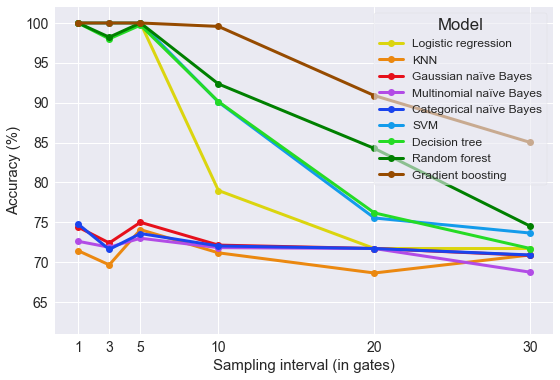

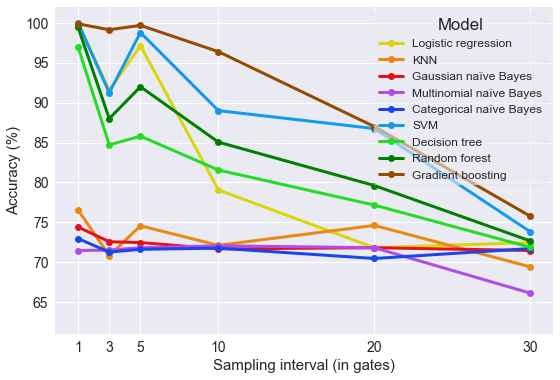

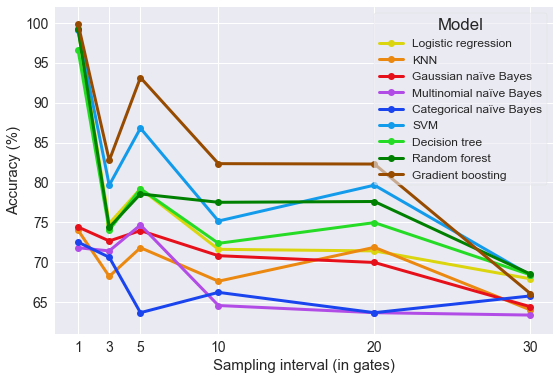

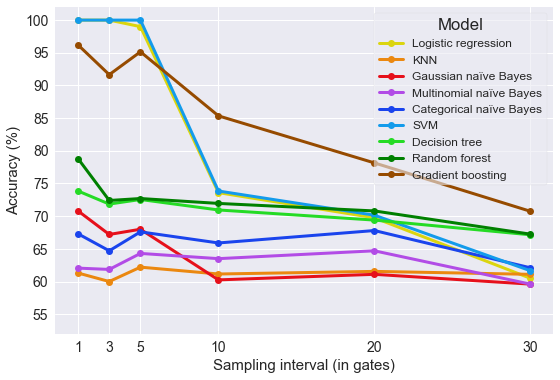

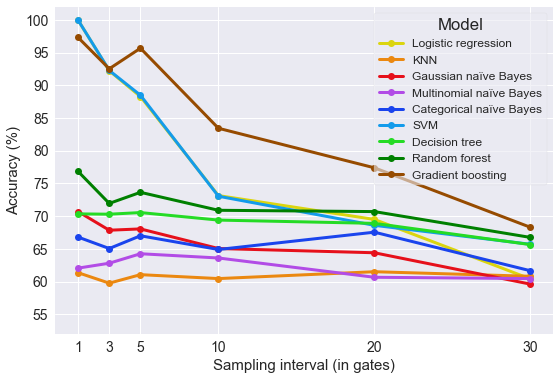

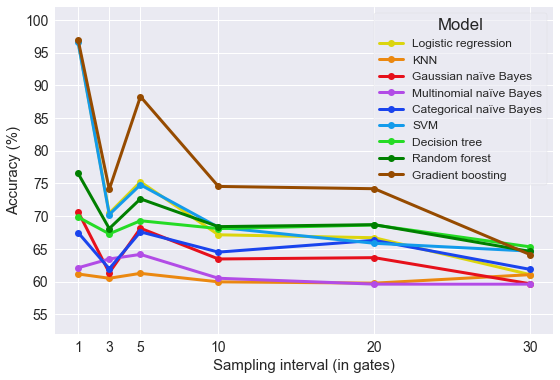

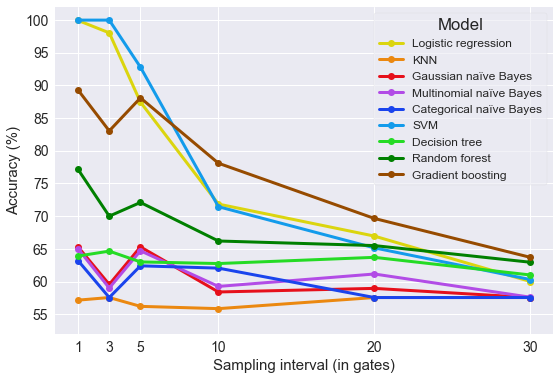

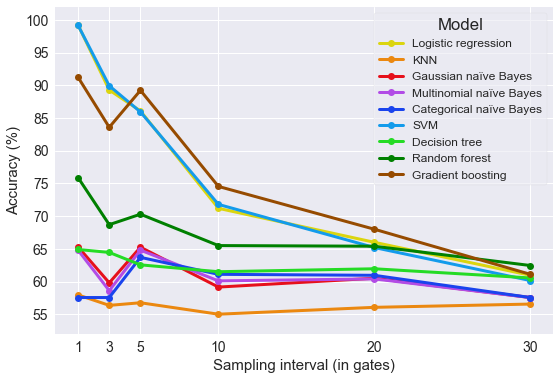

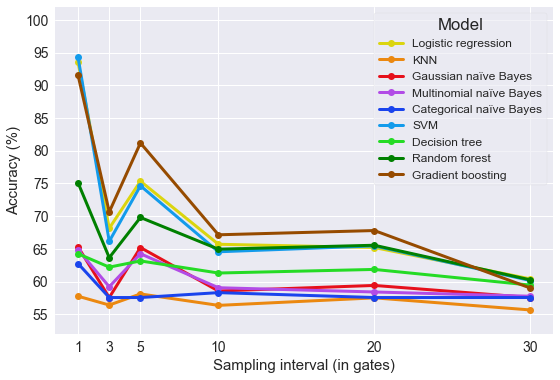

In [75]:
# Accuracy vs sampling interval - per model (one plot per matrix size & noise level)
plt.rcParams.update({'legend.fontsize': 12})
for (n, m), ylow in zip(matrix_sizes, [61, 52, 52]):
    for noise in noises:
        df = df_more_1s_acc[n+'x'+m][noise].T

        df.plot(lw=3, marker='o', ms=7, color=colors, xticks=df.index, yticks=np.arange(5*np.ceil(ylow/5), 101, 5),
                ylim=(ylow,102), xlabel='Sampling interval (in gates)', ylabel='Accuracy (%)', legend=False)
        plt.legend(models, title='Model', title_fontsize='large', frameon=True, fancybox=True, framealpha=0.6)
        
        plt.savefig(f'Results/Plots/acc_vs_sampling_per_model_{nb_name}_{n}x{m}_noise_std={noise}.png', dpi=200)
plt.show()

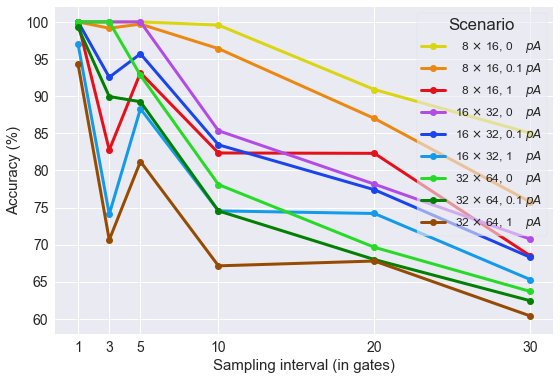

In [76]:
# Best accuracy vs sampling interval - per matrix size and noise level
plt.rcParams.update({'legend.fontsize': 12})
df = df_more_1s_acc.max().unstack(level=[0,1]).sort_index() # get maximum value for accuracy per sampling interval, turn matrix size & noise level into columns, sort sampling intervals

ylow = 58
ax = df.plot(lw=3, marker='o', ms=7, color=colors, xticks=df.index, yticks=np.arange(5*np.ceil(ylow/5), 101, 5), ylim=(ylow,102),
             xlabel='Sampling interval (in gates)', ylabel='Accuracy (%)', legend=False)
plt.legend(['  8 $\\times$ 16, 0    $pA$', '  8 $\\times$ 16, 0.1 $pA$', '  8 $\\times$ 16, 1    $pA$',
            '16 $\\times$ 32, 0    $pA$', '16 $\\times$ 32, 0.1 $pA$', '16 $\\times$ 32, 1    $pA$',
            '32 $\\times$ 64, 0    $pA$', '32 $\\times$ 64, 0.1 $pA$', '32 $\\times$ 64, 1    $pA$'],
           title='Scenario', title_fontsize='large', frameon=True, fancybox=True, framealpha=0.6)

plt.savefig(f'Results/Plots/acc_vs_sampling_per_size_&_noise_{nb_name}.png', dpi=200)
plt.show()

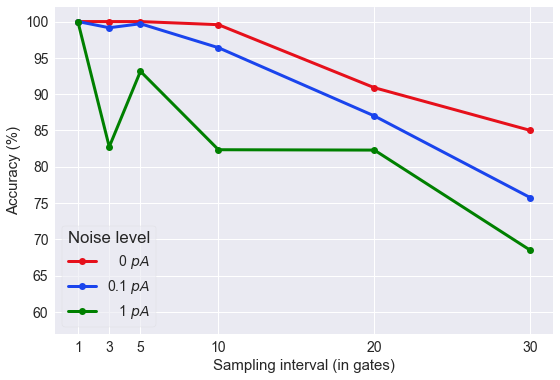

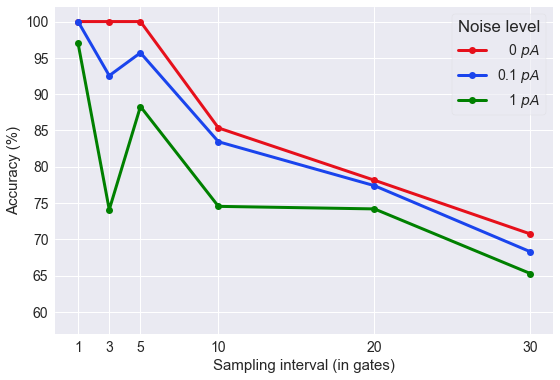

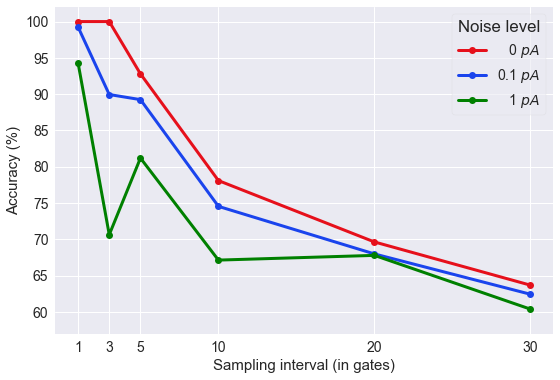

In [77]:
# Best accuracy vs sampling interval - per noise level (one plot per matrix size)
plt.rcParams.update({'legend.fontsize': 14})
for (n, m), ylow in zip(matrix_sizes, [57, 57, 57]):
    df = df_more_1s_acc.max()[n+'x'+m].unstack(level=0).sort_index() # get maximum value for accuracy per sampling interval, choose matrix size, turn noise level into columns & sort sampling intervals

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[2,4,7]], xticks=df.index, yticks=np.arange(5*np.ceil(ylow/5), 101, 5),
                 ylim=(ylow,102), xlabel='Sampling interval (in gates)', ylabel='Accuracy (%)', legend=False)
    plt.legend(['   0 $pA$', '0.1 $pA$', '   1 $pA$'], title='Noise level', title_fontsize='large',
               frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/acc_vs_sampling_per_noise_{nb_name}_{n}x{m}.png', dpi=200)
plt.show()

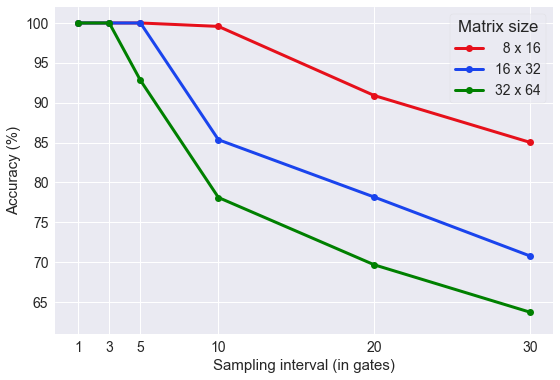

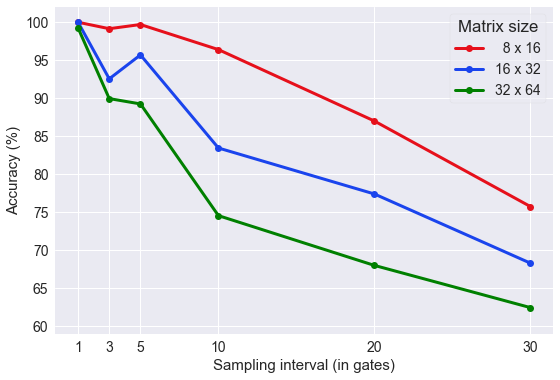

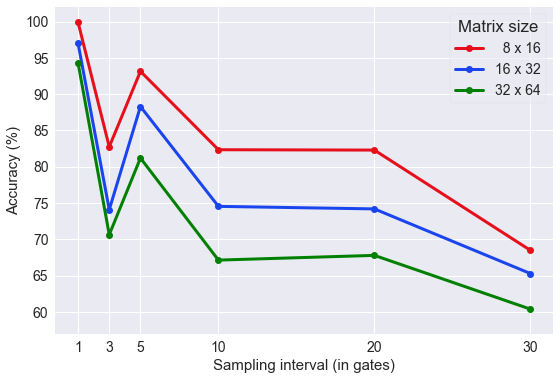

In [78]:
# Best accuracy vs sampling interval - per matrix size (one plot per noise level)
plt.rcParams.update({'legend.fontsize': 14})
for noise, ylow in zip(noises, [61, 59, 57]):
    df = df_more_1s_acc.max()[:, noise].unstack(level=0).sort_index() # get maximum value for accuracy per sampling interval, choose noise level, turn matrix size into columns & sort sampling intervals
    df = df[[m+'x'+n for m, n in matrix_sizes]] # reorder matrix sizes

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[2,4,7]], xticks=df.index, yticks=np.arange(5*np.ceil(ylow/5), 101, 5),
                 ylim=(ylow,102), xlabel='Sampling interval (in gates)', ylabel='Accuracy (%)', legend=False)
    plt.legend(['  8 x 16', '16 x 32', '32 x 64'], title='Matrix size', title_fontsize='large',
               frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/acc_vs_sampling_per_size_{nb_name}_noise_std={noise}.png', dpi=200)
plt.show()

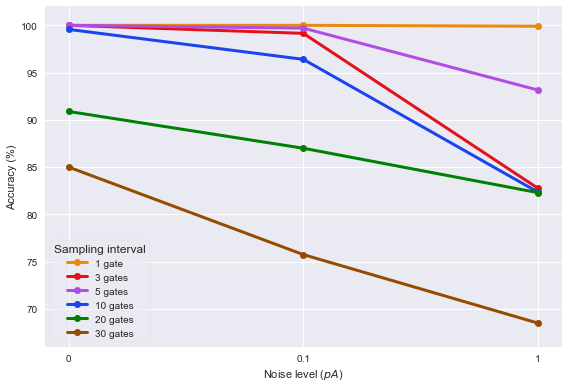

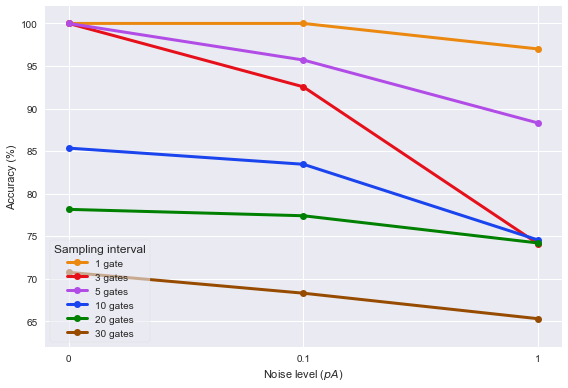

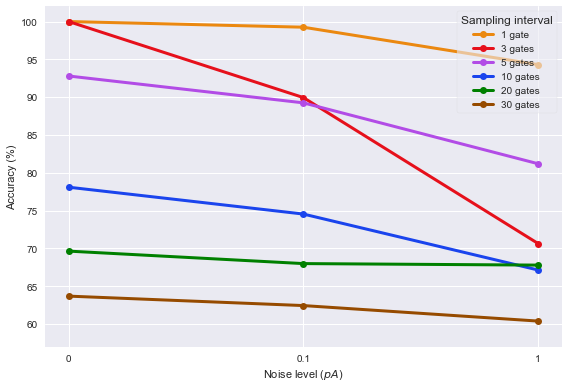

In [72]:
# Best accuracy vs noise level - per sampling interval (one plot per matrix size)
for (n, m), ylow in zip(matrix_sizes, [66, 62, 57]):
    df = df_more_1s_acc.max()[n+'x'+m].unstack().sort_index(axis=1) # get maximum value for accuracy per sampling interval, choose matrix size, turn sampling interval into columns & sort them

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[1,2,3,4,7,8]], xticks=range(len(df.index)),
                 yticks=np.arange(5*np.ceil(ylow/5), 101, 5), ylim=(ylow,102), xlabel='Noise level ($pA$)', ylabel='Accuracy (%)',
                 legend=False)
    ax.set_xticklabels([0, 0.1, 1])
    plt.legend(['1 gate', '3 gates', '5 gates', '10 gates', '20 gates', '30 gates'], title='Sampling interval',
               title_fontsize='large', frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/acc_vs_noise_per_sampling_{nb_name}_{n}x{m}.png', dpi=200)
plt.show()

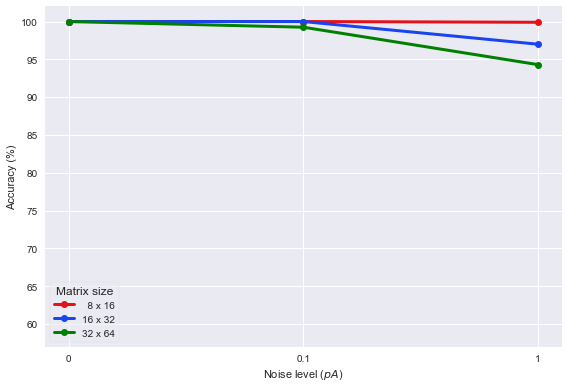

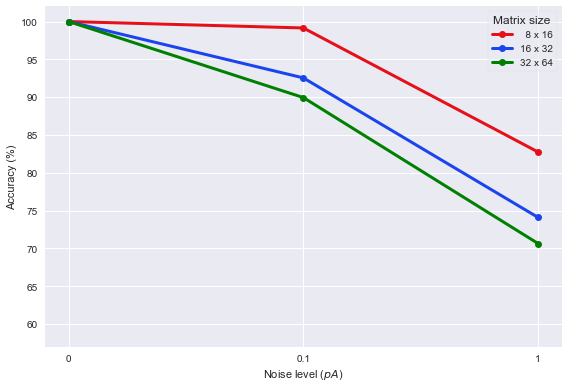

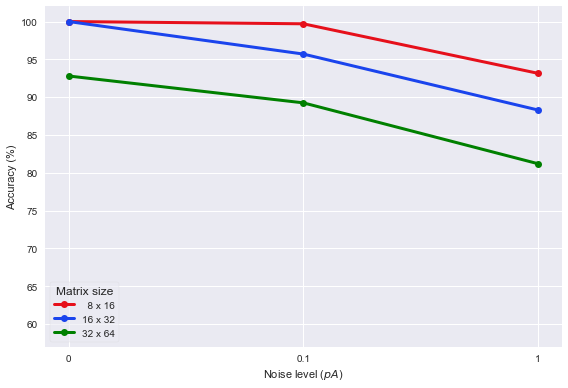

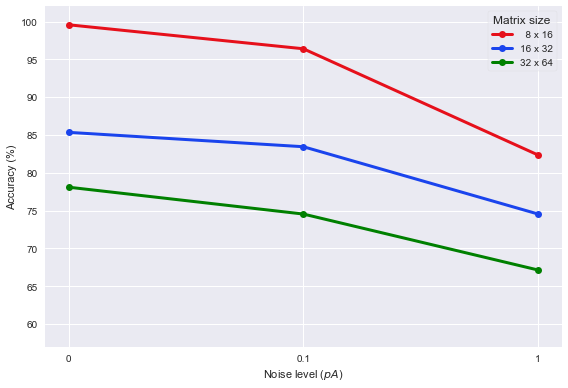

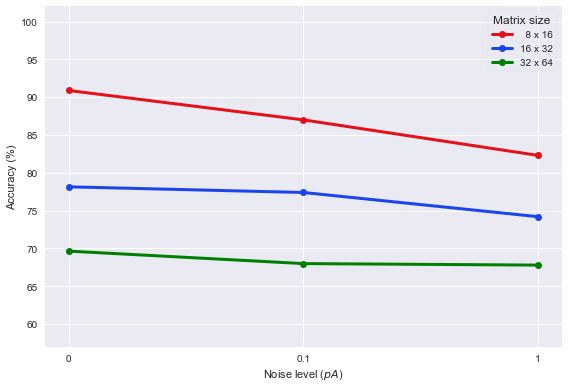

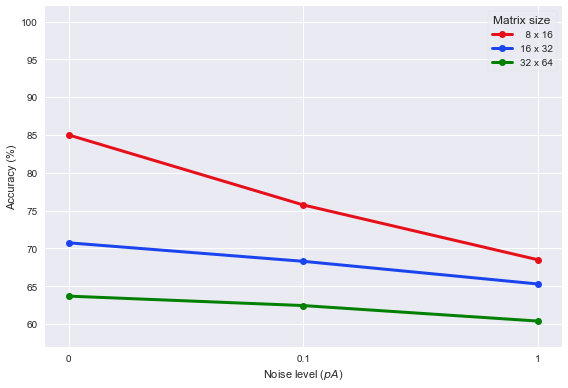

In [73]:
# Best accuracy vs noise level - per matrix size (one plot per sampling interval)
for sampling in samplings:
    df = df_more_1s_acc.max()[:, :, sampling].unstack(level=0) # get maximum value for accuracy per sampling interval, choose sampling interval & turn matrix size into columns
    df = df[[m+'x'+n for m, n in matrix_sizes]] # reorder matrix sizes

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[2,4,7]], xticks=range(len(df.index)), yticks=range(60, 101, 5),
                 ylim=(57,102), xlabel='Noise level ($pA$)', ylabel='Accuracy (%)', legend=False)
    ax.set_xticklabels([0, 0.1, 1])
    plt.legend(['  8 x 16', '16 x 32', '32 x 64'], title='Matrix size', title_fontsize='large',
               frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/acc_vs_noise_per_size_{nb_name}_sampling={sampling}.png', dpi=200)
plt.show()

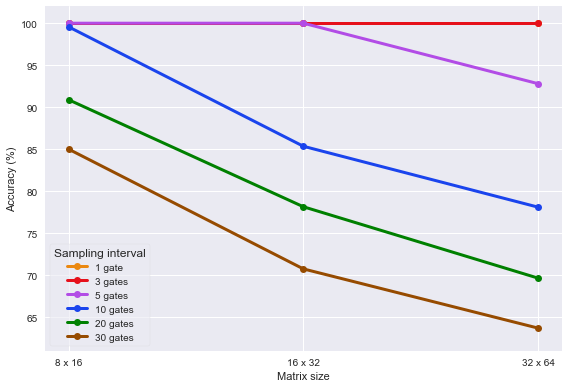

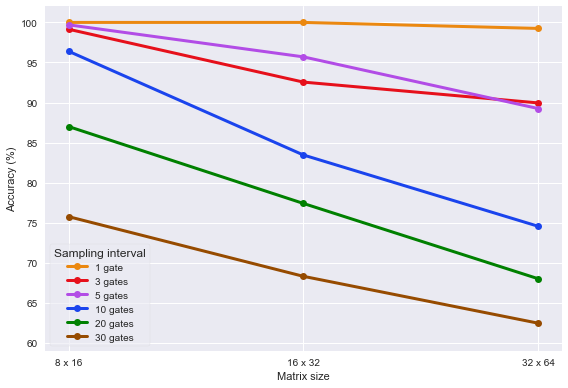

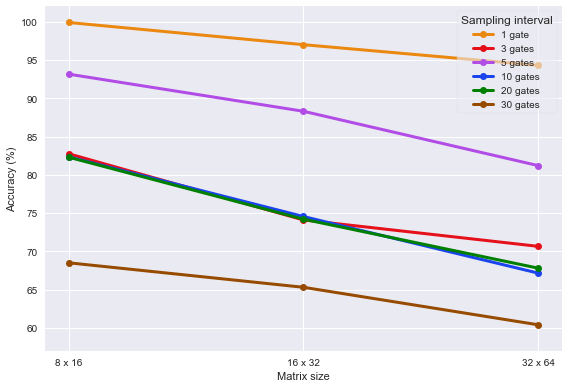

In [74]:
# Best accuracy vs matrix size - per sampling interval (one plot per noise level)
for noise, ylow in zip(noises, [61, 59, 57]):
    df = df_more_1s_acc.max()[:, noise].unstack(level=1).sort_index(axis=1) # get maximum value for accuracy per sampling interval, choose noise level, turn sampling interval into columns & sort them
    df = df.reindex([m+'x'+n for m, n in matrix_sizes], copy=False) # reorder matrix sizes

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[1,2,3,4,7,8]], xticks=range(len(df.index)),
                 yticks=np.arange(5*np.ceil(ylow/5), 101, 5), ylim=(ylow,102), xlabel='Matrix size', ylabel='Accuracy (%)',
                 legend=False)
    ax.set_xticklabels([m+' x '+n for m, n in matrix_sizes])
    plt.legend(['1 gate', '3 gates', '5 gates', '10 gates', '20 gates', '30 gates'], title='Sampling interval',
               title_fontsize='large', frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/acc_vs_size_per_sampling_{nb_name}_noise_std={noise}.png', dpi=200)
plt.show()

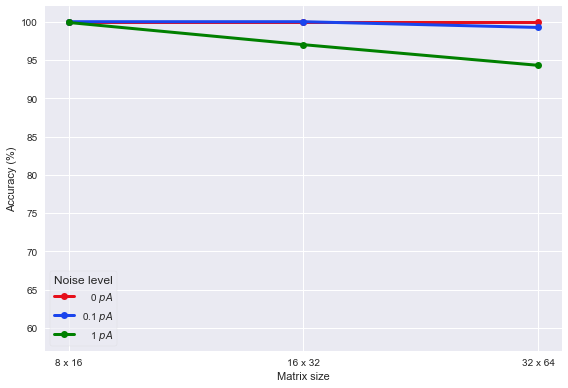

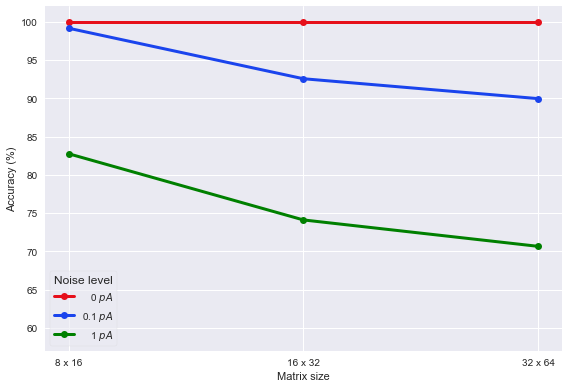

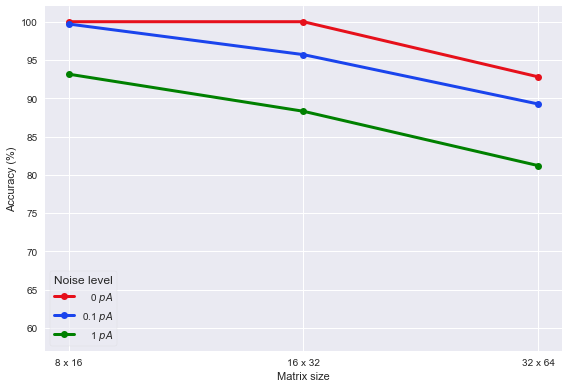

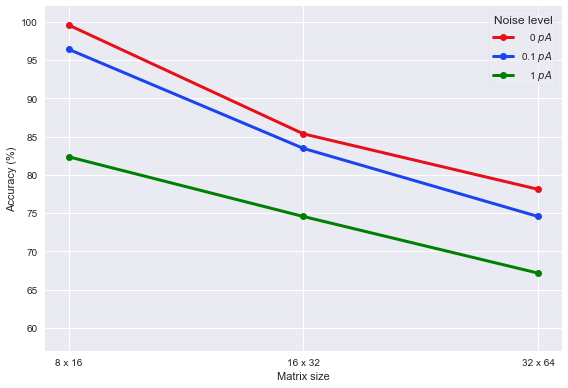

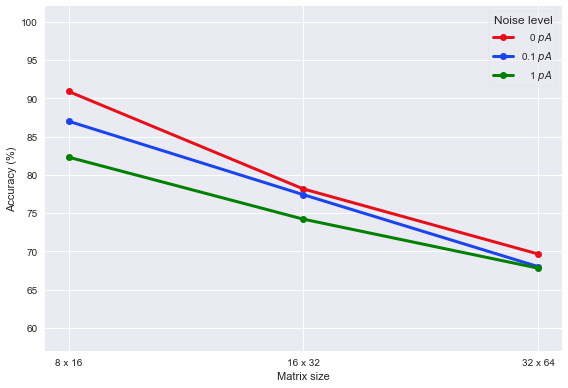

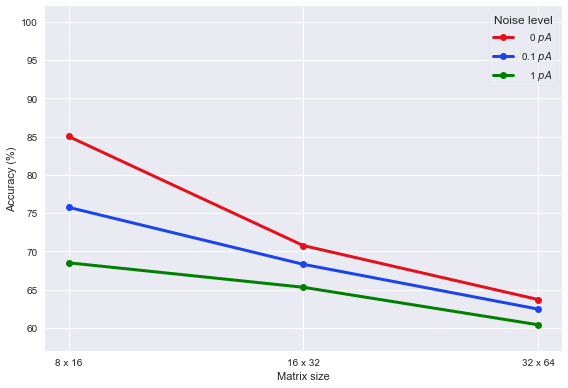

In [75]:
# Best accuracy vs matrix size - per noise level (one plot per sampling interval)
for sampling in samplings:
    df = df_more_1s_acc.max()[:, :, sampling].unstack(level=1) # get maximum value for accuracy per sampling interval, choose sampling interval & turn noise level into columns
    df = df.reindex([m+'x'+n for m, n in matrix_sizes], copy=False) # reorder matrix sizes

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[2,4,7]], xticks=range(len(df.index)), yticks=range(60, 101, 5),
                 ylim=(57,102), xlabel='Matrix size', ylabel='Accuracy (%)', legend=False)
    ax.set_xticklabels([m+' x '+n for m, n in matrix_sizes])
    plt.legend(['   0 $pA$', '0.1 $pA$', '   1 $pA$'], title='Noise level', title_fontsize='large',
               frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/acc_vs_size_per_noise_{nb_name}_sampling={sampling}.png', dpi=200)
plt.show()

### Full-matrix models

`- Hamming loss vs sampling interval - per model             (one plot per matrix size & noise level)`  
`- Hamming loss vs sampling interval - per noise level       (one plot per matrix size)`  
`- Hamming loss vs sampling interval - per matrix size       (one plot per noise level)`  
Also:  
`- Hamming loss vs noise level       - per sampling interval (one plot per matrix size)`  
`- Hamming loss vs noise level       - per matrix size       (one plot per sampling interval)`  
`- Hamming loss vs matrix size       - per sampling interval (one plot per noise level)`  
`- Hamming loss vs matrix size       - per noise level       (one plot per sampling interval)`

In [3]:
nb_name = 'full_solution'

In [4]:
df_full_hamming = pd.read_csv('Results/Results_full_solution_hamming_loss.csv', sep=';', index_col=0, header=[0,1,2])
df_full_hamming.columns = df_full_hamming.columns.set_levels(df_full_hamming.columns.levels[2].astype('int'), level=2) # convert sampling interval to integers
df_full_hamming = df_full_hamming.loc[['LR', 'KNN', 'Gaussian NB', 'Multi NB', 'Cat NB', 'SVM', 'DT', 'RF', 'GB']] # reorder models
df_full_hamming

8x16                                                          \
                 0                                      0.05                 
                1      3      5      10     20     30     1      3      5    
LR            0.00   0.00   0.00  21.87  37.84  34.27   0.00   0.42   0.06   
KNN          22.94  27.00  22.70  22.56  25.75  30.32  22.29  27.46  23.09   
Gaussian NB   0.00  15.53  14.10  26.59  35.79  35.07   0.12  16.80  14.59   
Multi NB      5.32  18.02  17.92  28.73  37.93  34.78  10.42  22.23  19.89   
Cat NB        0.00  19.47  10.59  22.81  31.93  34.87   0.00  19.89  11.19   
SVM           0.00   0.00   0.00   3.07   4.15  23.30   0.00   0.62   0.01   
DT            0.00   0.05   0.00   2.35  14.37  24.86   0.00   1.01   0.31   
RF            0.00   0.00   0.00   1.84   5.87  15.05   0.00   0.06   0.00   
GB            0.00   0.00   0.00   0.00   1.04   5.08   0.00   0.00   0.00   

                                                                            \
                                    0.5                                      
                10     20     30     1      3      5      10     20     30   
LR           21.29  37.02  34.38   0.00  23.46  18.66  31.26  37.09  38.89   
KNN          23.18  23.29  29.12  23.18  30.39  25.40  29.39  25.32  38.56   
Gaussian NB  25.94  35.08  34.42   1.44  26.32  20.14  30.71  35.26  39.16   
Multi NB     28.22  36.60  34.26  10.91  29.81  24.78  33.81  37.45  39.30   
Cat NB       22.15  30.63  34.11   0.50  28.28  18.84  28.81  33.01  39.77   
SVM           2.56   4.03  27.32   0.00  14.41   5.73  14.49  10.47  36.19   
DT            4.23  16.03  28.52   0.09  13.14   7.83  15.64  16.34  39.12   
RF            3.20   9.26  18.91   0.06   7.75   3.50  12.15  14.32  37.89   
GB            0.12   5.46  20.13   0.06   1.52   0.41   4.34  10.71  31.28   

             16x32                                                          \
                 0                                      0.05                 
                1      3      5      10     20     30     1      3      5    
LR            0.00   0.00   0.00  28.59  35.98  46.93   0.00   0.27   2.87   
KNN          38.21  40.99  38.24  39.65  39.13  40.77  38.24  37.24  38.25   
Gaussian NB   0.00  14.17  17.33  32.53  36.59  46.08   3.39  18.07  18.30   
Multi NB      9.83  21.91  23.47  36.05  39.68  46.98  21.27  29.92  25.15   
Cat NB        0.00  20.38   8.30  25.85  29.80  44.29   0.00  20.39   8.37   
SVM           0.00   0.00   0.00  15.38  22.06  31.37   0.00   0.28   2.84   
DT           17.92  23.95  22.38  23.50  25.13  37.88  19.87  26.45  23.68   
RF            0.00  12.79   2.69  12.15  18.04  31.54   0.00  12.09   2.89   
GB            0.00   0.00   0.00   2.00  11.72  25.67   0.00   0.02   0.01   

                                                                            \
                                    0.5                                      
                10     20     30     1      3      5      10     20     30   
LR           28.51  35.85  46.73   0.00  25.87  20.72  35.39  38.64  46.68   
KNN          40.38  39.60  40.72  38.31  41.74  38.36  40.72  40.22  41.29   
Gaussian NB  32.91  36.52  46.11   6.29  33.29  24.11  36.66  37.37  46.17   
Multi NB     36.57  39.95  47.04  18.04  38.32  29.78  40.67  40.67  46.87   
Cat NB       25.83  29.88  44.21   1.60  32.78  19.47  33.91  34.61  45.00   
SVM          16.24  23.15  31.85   0.00  27.00  16.48  25.56  26.35  36.97   
DT           25.07  26.40  37.43  20.10  30.13  25.84  29.04  28.70  39.14   
RF            7.37  19.59  34.27   0.03  27.32  11.44  23.35  22.75  38.43   
GB            3.17  18.35  28.96   0.03   1.69   0.56  14.65  20.74  34.94   

             32x64                                                          \
                 0                                      0.05                 
                1      3      5      10     20     30     1      3      5    
LR            0.00   0.00   0.00

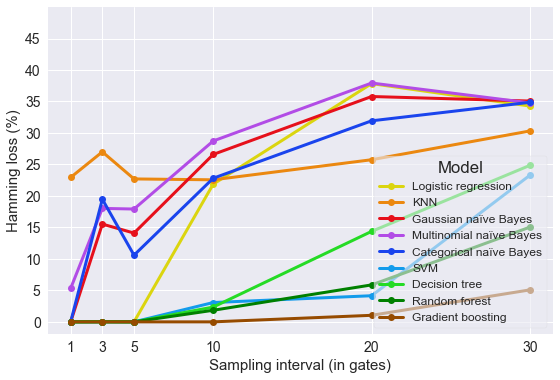

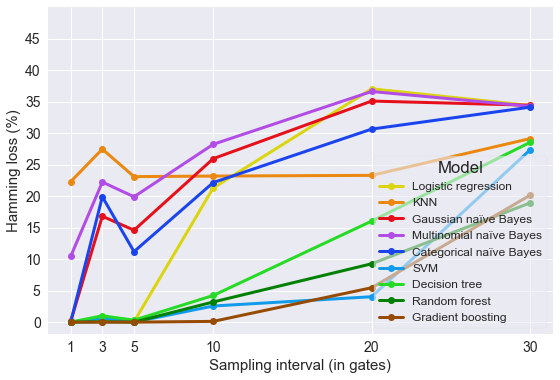

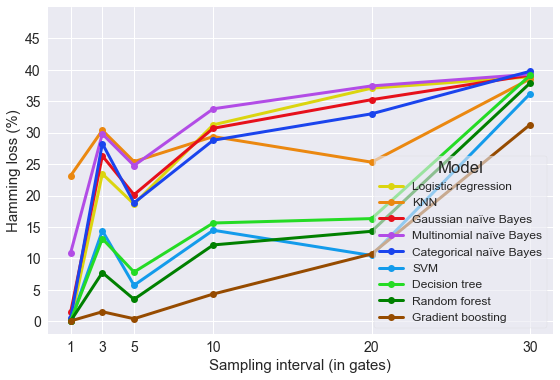

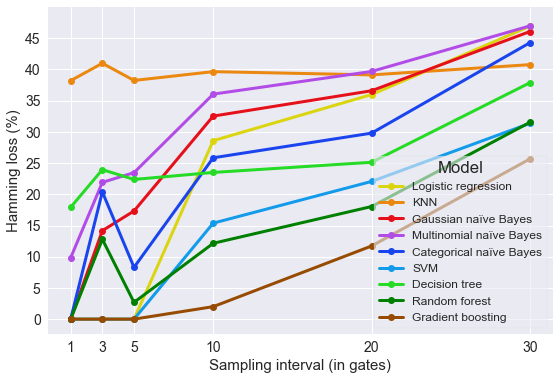

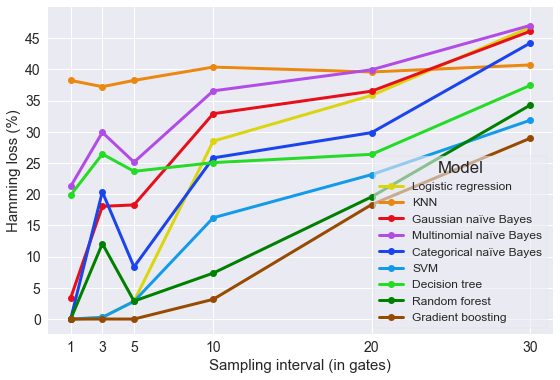

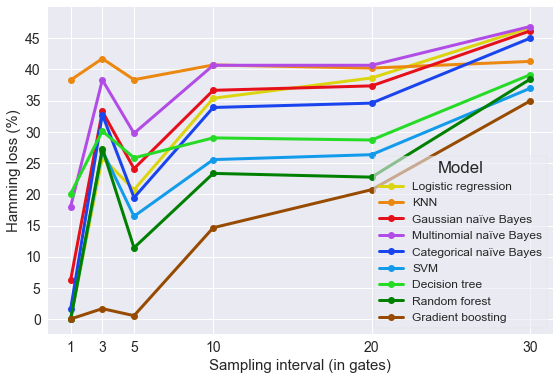

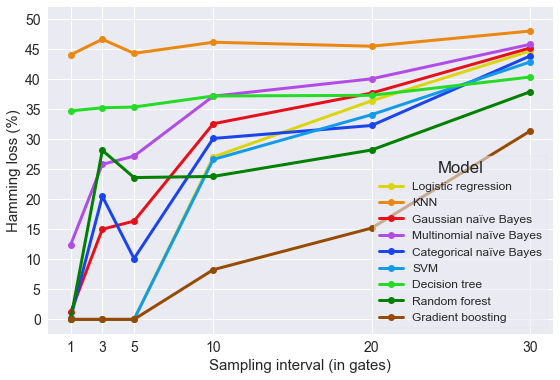

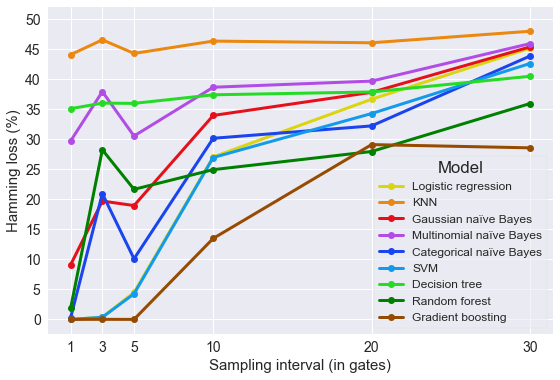

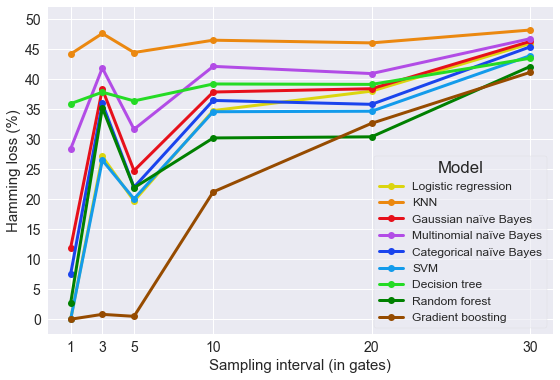

In [115]:
# Hamming loss vs sampling interval - per model (one plot per matrix size & noise level)
plt.rcParams.update({'legend.fontsize': 12})
for (n, m), yup in zip(matrix_sizes, [50, 50, 52]):
    for noise in noises:
        df = df_full_hamming[n+'x'+m][noise].T

        df.plot(lw=3, marker='o', ms=7, color=colors, xticks=df.index, yticks=range(0, yup, 5), ylim=(None,yup),
                xlabel='Sampling interval (in gates)', ylabel='Hamming loss (%)', legend=False)
        plt.legend(models, title='Model', title_fontsize='large', loc='lower right', frameon=True, fancybox=True, framealpha=0.6)

        plt.savefig(f'Results/Plots/hamming_loss_vs_sampling_per_model_{nb_name}_{n}x{m}_noise_std={noise}.png', dpi=200)
plt.show()

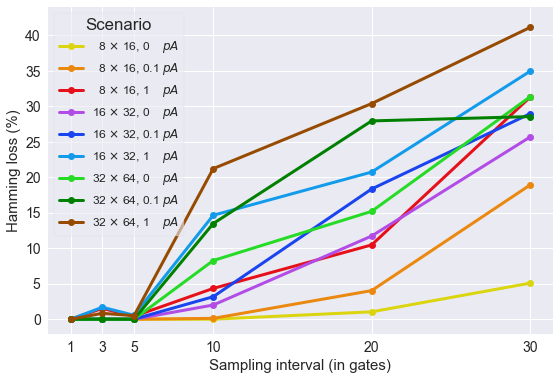

In [82]:
# Best hamming loss vs sampling interval - per matrix size and noise level
plt.rcParams.update({'legend.fontsize': 12})
df = df_full_hamming.min().unstack(level=[0,1]).sort_index() # get minimum value for hamming loss per sampling interval, turn matrix size & noise level into columns, sort sampling intervals

yup = 44
ax = df.plot(lw=3, marker='o', ms=7, color=colors, xticks=df.index, yticks=range(0, yup, 5), ylim=(None,yup),
             xlabel='Sampling interval (in gates)', ylabel='Hamming loss (%)', legend=False)
plt.legend(['  8 $\\times$ 16, 0    $pA$', '  8 $\\times$ 16, 0.1 $pA$', '  8 $\\times$ 16, 1    $pA$',
            '16 $\\times$ 32, 0    $pA$', '16 $\\times$ 32, 0.1 $pA$', '16 $\\times$ 32, 1    $pA$',
            '32 $\\times$ 64, 0    $pA$', '32 $\\times$ 64, 0.1 $pA$', '32 $\\times$ 64, 1    $pA$'],
           title='Scenario', title_fontsize='large', frameon=True, fancybox=True, framealpha=0.6)

plt.savefig(f'Results/Plots/hamming_loss_vs_sampling_per_size_&_noise_{nb_name}.png', dpi=200)
plt.show()

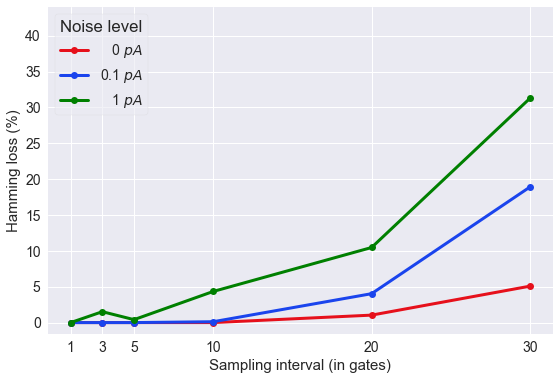

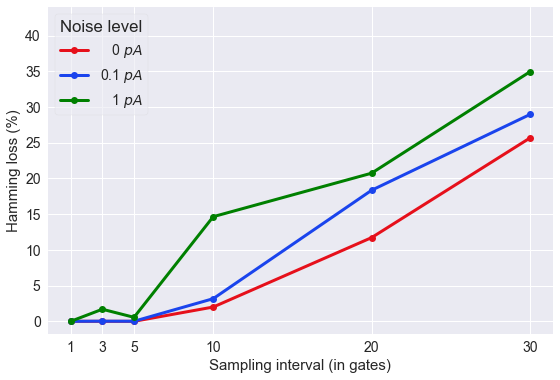

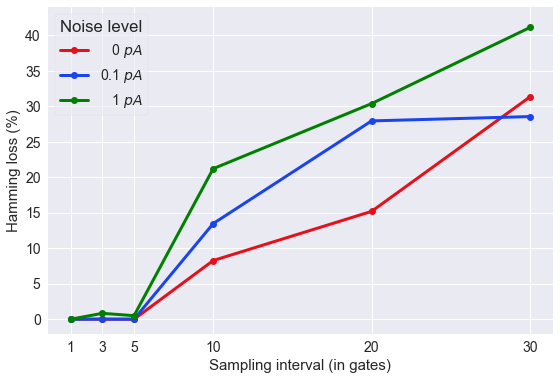

In [94]:
# Best hamming loss vs sampling interval - per noise level (one plot per matrix size)
plt.rcParams.update({'legend.fontsize': 14})
for (n, m), yup in zip(matrix_sizes, [44, 44, 44]):
    df = df_full_hamming.min()[n+'x'+m].unstack(level=0).sort_index() # get minimum value for hamming loss per sampling interval, choose matrix size, turn noise level into columns & sort sampling intervals

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[2,4,7]], xticks=df.index, yticks=range(0, yup, 5), ylim=(None,yup),
                 xlabel='Sampling interval (in gates)', ylabel='Hamming loss (%)', legend=False)
    plt.legend(['   0 $pA$', '0.1 $pA$', '   1 $pA$'], title='Noise level', title_fontsize='large',
               frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/hamming_loss_vs_sampling_per_noise_{nb_name}_{n}x{m}.png', dpi=200)
plt.show()

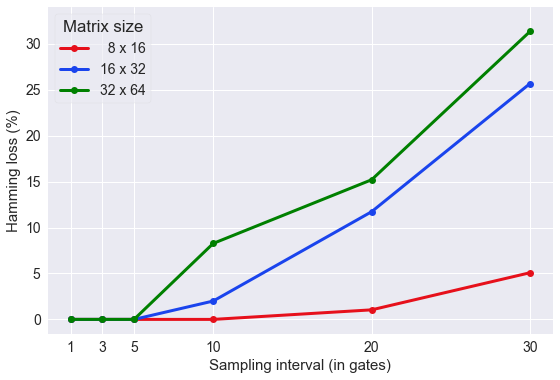

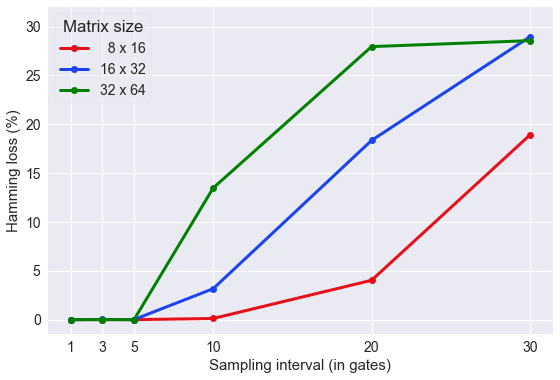

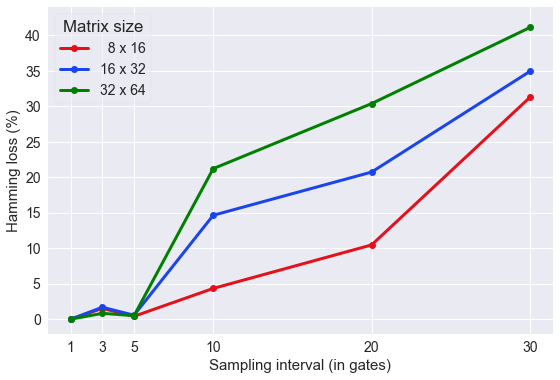

In [84]:
# Best hamming loss vs sampling interval - per matrix size (one plot per noise level)
plt.rcParams.update({'legend.fontsize': 14})
for noise, yup in zip(noises, [34, 32, 44]):
    df = df_full_hamming.min()[:, noise].unstack(level=0).sort_index() # get minimum value for hamming loss per sampling interval, choose noise level, turn matrix size into columns & sort sampling intervals
    df = df[[m+'x'+n for m, n in matrix_sizes]] # reorder matrix sizes

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[2,4,7]], xticks=df.index, yticks=range(0, yup, 5), ylim=(None,yup),
                 xlabel='Sampling interval (in gates)', ylabel='Hamming loss (%)', legend=False)
    plt.legend(['  8 x 16', '16 x 32', '32 x 64'], title='Matrix size', title_fontsize='large',
               frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/hamming_loss_vs_sampling_per_size_{nb_name}_noise_std={noise}.png', dpi=200)
plt.show()

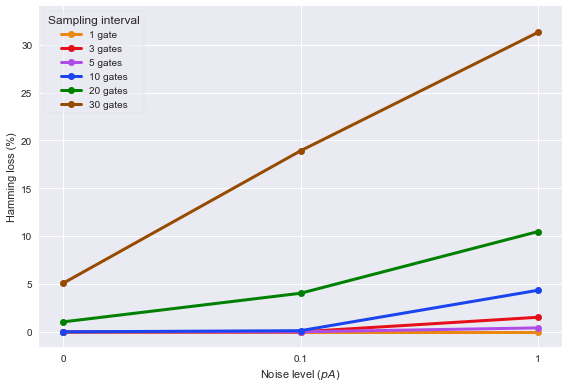

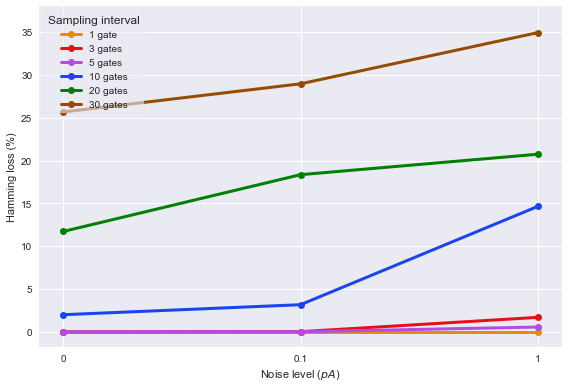

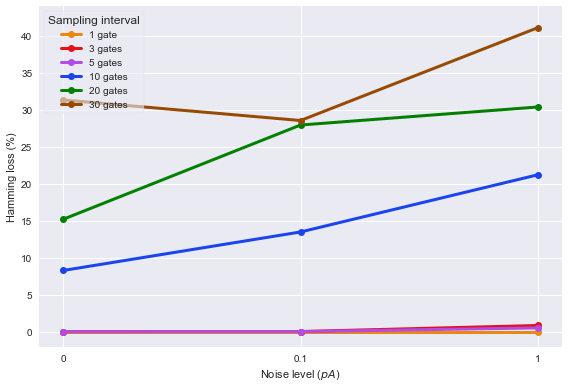

In [114]:
# Best hamming loss vs noise level - per sampling interval (one plot per matrix size)
for (n, m), yup in zip(matrix_sizes, [34, 38, 44]):
    df = df_full_hamming.min()[n+'x'+m].unstack().sort_index(axis=1) # get minimum value for hamming loss per sampling interval, choose matrix size, turn sampling interval into columns & sort them

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[1,2,3,4,7,8]], xticks=range(len(df.index)), yticks=range(0, yup, 5),
                 ylim=(None,yup), xlabel='Noise level ($pA$)', ylabel='Hamming loss (%)', legend=False)
    ax.set_xticklabels([0, 0.1, 1])
    plt.legend(['1 gate', '3 gates', '5 gates', '10 gates', '20 gates', '30 gates'], title='Sampling interval',
               title_fontsize='large', loc='upper left', frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/hamming_loss_vs_noise_per_sampling_{nb_name}_{n}x{m}.png', dpi=200)
plt.show()

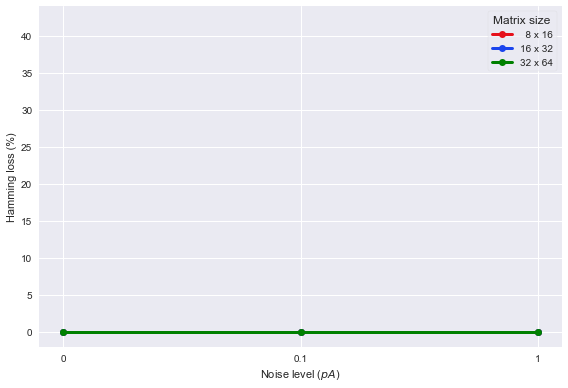

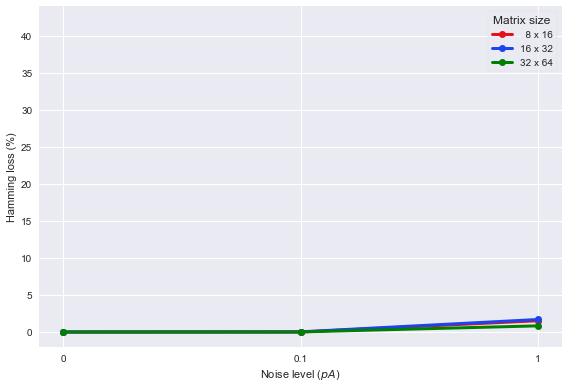

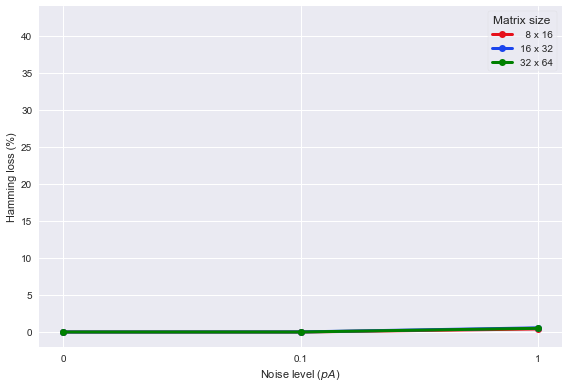

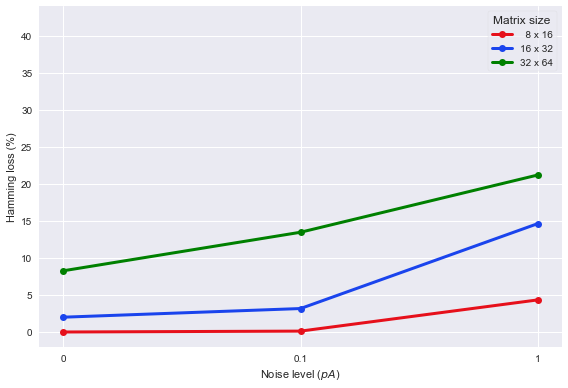

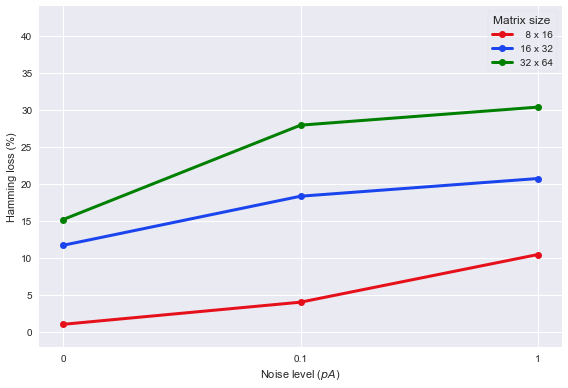

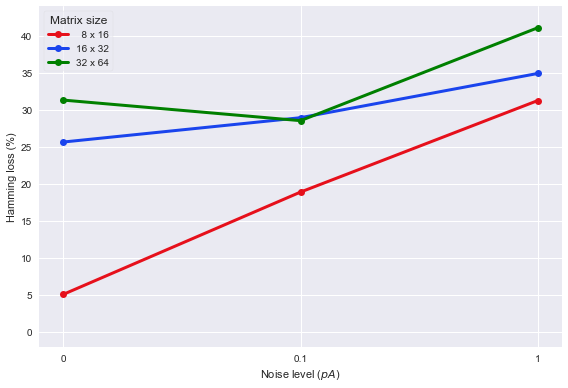

In [119]:
# Best hamming loss vs noise level - per matrix size (one plot per sampling interval)
for sampling in samplings:
    df = df_full_hamming.min()[:, :, sampling].unstack(level=0) # get minimum value for hamming loss per sampling interval, choose sampling interval & turn matrix size into columns
    df = df[[m+'x'+n for m, n in matrix_sizes]] # reorder matrix sizes

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[2,4,7]], xticks=range(len(df.index)), yticks=range(0, 44, 5), ylim=(-2,44),
                 xlabel='Noise level ($pA$)', ylabel='Hamming loss (%)', legend=False)
    ax.set_xticklabels([0, 0.1, 1])
    plt.legend(['  8 x 16', '16 x 32', '32 x 64'], title='Matrix size', title_fontsize='large',
               frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/hamming_loss_vs_noise_per_size_{nb_name}_sampling={sampling}.png', dpi=200)
plt.show()

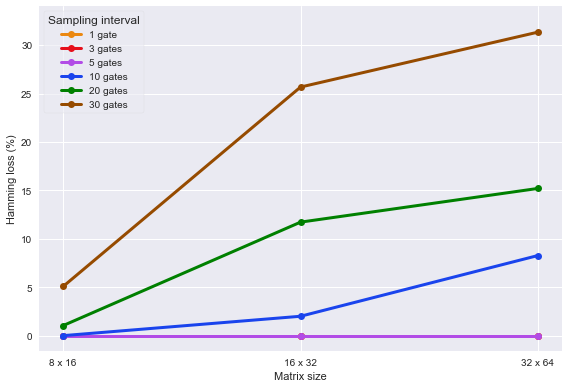

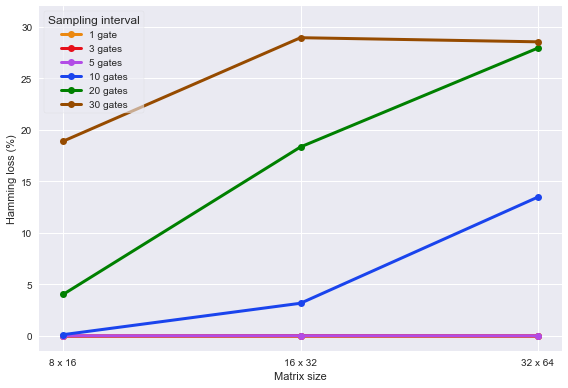

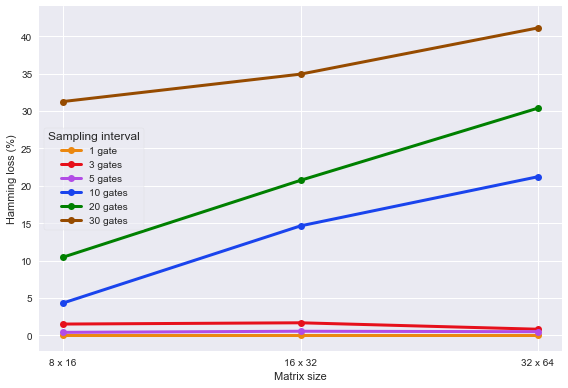

In [118]:
# Best hamming loss vs matrix size - per sampling interval (one plot per noise level)
for noise, yup in zip(noises, [34, 32, 44]):
    df = df_full_hamming.min()[:, noise].unstack(level=1).sort_index(axis=1) # get minimum value for hamming loss per sampling interval, choose noise level, turn sampling interval into columns & sort them
    df = df.reindex([m+'x'+n for m, n in matrix_sizes], copy=False) # reorder matrix sizes

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[1,2,3,4,7,8]], xticks=range(len(df.index)), yticks=range(0, yup, 5),
                 ylim=(None,yup), xlabel='Matrix size', ylabel='Hamming loss (%)', legend=False)
    ax.set_xticklabels([m+' x '+n for m, n in matrix_sizes])
    plt.legend(['1 gate', '3 gates', '5 gates', '10 gates', '20 gates', '30 gates'], title='Sampling interval',
               title_fontsize='large', frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/hamming_loss_vs_size_per_sampling_{nb_name}_noise_std={noise}.png', dpi=200)
plt.show()

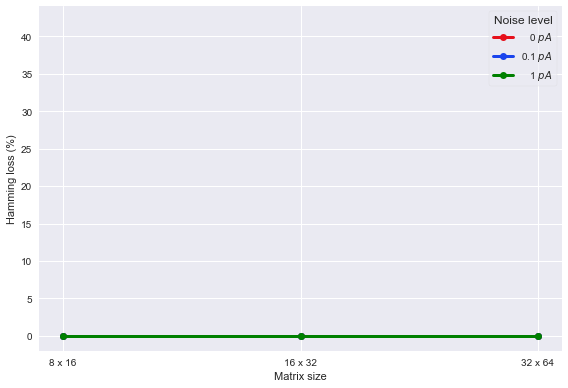

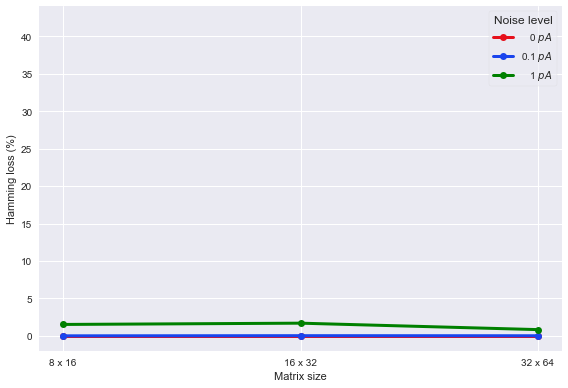

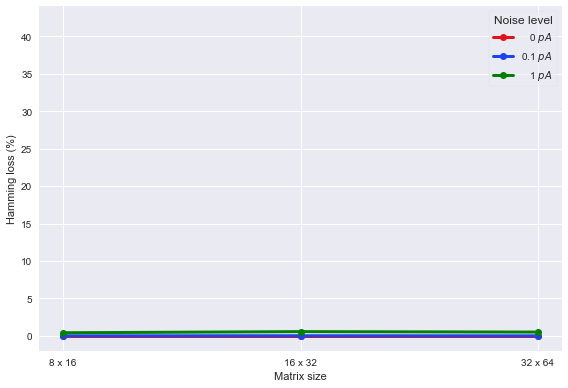

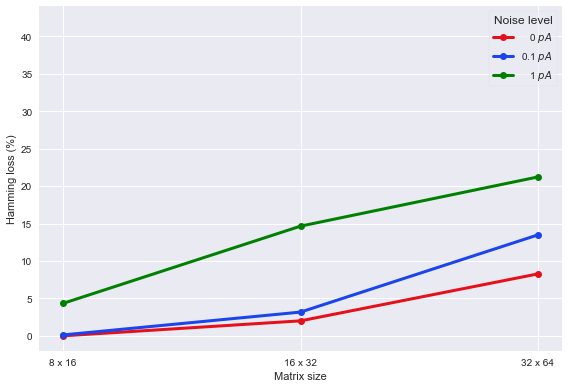

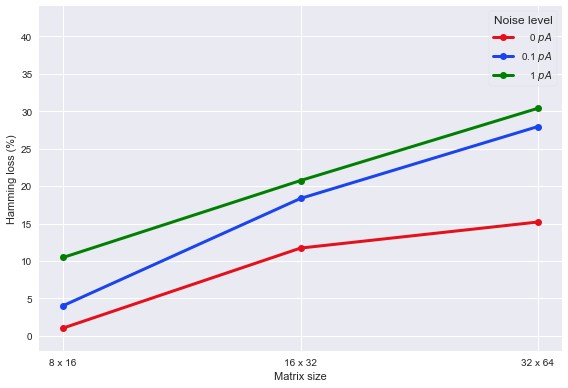

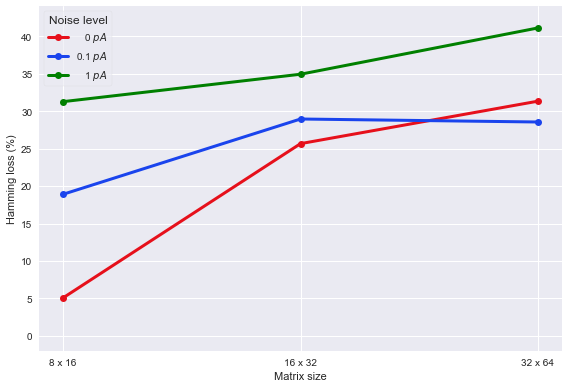

In [120]:
# Best hamming loss vs matrix size - per noise level (one plot per sampling interval)
for sampling in samplings:
    df = df_full_hamming.min()[:, :, sampling].unstack(level=1) # get minimum value for hamming loss per sampling interval, choose sampling interval & turn noise level into columns
    df = df.reindex([m+'x'+n for m, n in matrix_sizes], copy=False) # reorder matrix sizes

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[2,4,7]], xticks=range(len(df.index)), yticks=range(0, 44, 5), ylim=(-2,44),
                 xlabel='Matrix size', ylabel='Hamming loss (%)', legend=False)
    ax.set_xticklabels([m+' x '+n for m, n in matrix_sizes])
    plt.legend(['   0 $pA$', '0.1 $pA$', '   1 $pA$'], title='Noise level', title_fontsize='large',
               frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/hamming_loss_vs_size_per_noise_{nb_name}_sampling={sampling}.png', dpi=200)
plt.show()

### Row models

`- Hamming loss vs sampling interval - per model             (one plot per matrix size & noise level)`  
`- Hamming loss vs sampling interval - per noise level       (one plot per matrix size)`  
`- Hamming loss vs sampling interval - per matrix size       (one plot per noise level)`  
Also:  
`- Hamming loss vs noise level       - per sampling interval (one plot per matrix size)`  
`- Hamming loss vs noise level       - per matrix size       (one plot per sampling interval)`  
`- Hamming loss vs matrix size       - per sampling interval (one plot per noise level)`  
`- Hamming loss vs matrix size       - per noise level       (one plot per sampling interval)`

In [5]:
nb_name = 'row_by_row'

In [86]:
# Recompute statistics from pickled objects

# Get prediction statistics
def get_statistics(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Group y data by key
    y_test_grouped = y_test.reshape((-1, n))
    y_pred_grouped = y_pred.reshape((-1, n))

    acc      = model.score(X_test, y_test)    
    hamming  = hamming_loss(y_test_grouped, y_pred_grouped)  # incorrectly-predicted bits
    zero_one = zero_one_loss(y_test_grouped, y_pred_grouped) # incorrectly-predicted keys
    return acc, hamming, zero_one

n, m        = 8, 16
noise_std   = 0.
model_names = ['LR1', 'KNN', 'NB_gaussian', 'NB_multi', 'NB_cat', 'SVM', 'DT', 'RF', 'GB']

df_acc      = pd.DataFrame(index=models, columns=samplings, dtype='float')
df_hamming  = pd.DataFrame(index=models, columns=samplings, dtype='float')
df_zero_one = pd.DataFrame(index=models, columns=samplings, dtype='float')

for sampling_interval in samplings:
    # Get test set
    test_set = joblib.load(f'Data/test_set_{nb_name}_{n}x{m}_noise_std={noise_std}_sampling={sampling_interval}.joblib')
    X_test = test_set['X_test']
    y_test = test_set['y_test']

    for model_name in model_names:
        print(sampling_interval, model_name)
        try:
            # Get model pipeline & statistics
            pipe = joblib.load(f'Results/Models/pipe_{model_name}_{nb_name}_{n}x{m}_noise_std={noise_std}_sampling={sampling_interval}.joblib')
            acc, hamming, zero_one = get_statistics(pipe, X_test, y_test)
        except:
            acc, hamming, zero_one = 100., 0., 0. # for the models I did not bother running

        df_acc.at[model_name, sampling_interval]      = acc * 100
        df_hamming.at[model_name, sampling_interval]  = hamming * 100
        df_zero_one.at[model_name, sampling_interval] = zero_one * 100

# Plot hamming loss vs sampling interval (per model)
df = df_hamming.T
df.plot(lw=3, marker='o', ms=7, color=colors, xticks=df.index,
        xlabel='Sampling interval (in gates)', ylabel='Hamming loss (%)', legend=False)

plt.legend(models, title='Model', title_fontsize='large', frameon=True, fancybox=True, shadow=True)

# plt.savefig(f'Results/Plots/plot_y.png', dpi=200)
plt.show()

NameError: name 'joblib' is not defined

In [6]:
df_row_hamming = pd.read_csv('Results/Results_row_by_row_hamming_loss.csv', sep=';', index_col=0, header=[0,1,2])
df_row_hamming.columns = df_row_hamming.columns.set_levels(df_row_hamming.columns.levels[2].astype('int'), level=2) # convert sampling interval to integers
df_row_hamming = df_row_hamming.loc[['LR', 'KNN', 'Gaussian NB', 'Multi NB', 'Cat NB', 'SVM', 'DT', 'RF', 'GB']] # reorder models
df_row_hamming

8x16                                                          \
                0                                      0.05                 
               1      3      5      10     20     30     1      3      5    
LR           0.00   0.00  33.48  44.33  43.22  43.57   0.00   3.45  31.80   
KNN          2.41   6.68   6.98  21.29  30.72  30.12   3.35  13.25  11.35   
Gaussian NB  0.00  15.71  37.90  43.98  45.08  43.42   6.00  20.20  37.10   
Multi NB     9.64  22.29  37.70  44.83  44.53  42.82  22.90  26.00  37.35   
Cat NB       0.00  24.05  19.63  25.50  32.98  34.84   0.00  22.30  20.75   
SVM          0.00   0.00   2.81  17.92  30.92  30.42   0.00   0.05   2.80   
DT           0.00   0.00   2.56  18.22  31.02  29.02   0.00   0.00   5.35   
RF           0.00   0.00   3.01  18.67  30.87  29.52   0.00   0.00   3.55   
GB           0.00   0.00   3.61  17.42  30.67  28.92   0.00   0.00   3.25   

                                                                            \
                                    0.5                                      
                10     20     30     1      3      5      10     20     30   
LR           42.15  43.75  43.70   0.00  25.95  32.05  43.40  45.10  43.80   
KNN          22.25  30.75  28.45   5.10  20.90  16.05  29.50  33.10  37.55   
Gaussian NB  43.45  44.10  43.70   8.25  27.90  37.80  43.05  43.40  43.70   
Multi NB     43.80  44.10  43.25  23.35  29.55  37.30  43.65  45.25  43.50   
Cat NB       28.45  33.00  33.65   0.60  28.00  28.15  37.35  35.35  41.75   
SVM          20.75  30.30  29.80   0.00  15.40  13.65  27.00  31.40  40.15   
DT           19.15  31.05  28.65   0.00   7.10  13.10  28.50  33.40  38.15   
RF           18.70  31.35  29.00   0.00   5.15  11.15  26.20  31.85  37.50   
GB           19.00  30.90  28.95   0.00   5.30  11.40  27.25  33.55  39.05   

            16x32                                                          \
                0                                      0.05                 
               1      3      5      10     20     30     1      3      5    
LR            0.0   0.00  37.55  42.80  48.80  48.45   0.00   1.90  37.55   
KNN          14.9  21.50  25.85  36.20  33.55  42.75  15.15  22.00  25.20   
Gaussian NB   0.0  13.05  47.70  45.65  49.70  48.35   0.50  14.60  47.80   
Multi NB      4.7  15.55  45.20  46.65  50.80  48.50  16.05  18.65  45.30   
Cat NB        0.0  22.10  20.40  33.35  32.70  45.70   0.00  22.25  23.30   
SVM           0.0   0.00  10.05  26.40  29.20  42.50   0.00   1.00  10.90   
DT            0.0   0.00   6.80  22.65  31.05  42.10   0.00   0.00   6.80   
RF            0.0   0.00   6.90  23.80  30.85  43.20   0.00   0.00   5.45   
GB            0.0   0.00   6.45  23.75  29.10  40.85   0.00   0.05   5.65   

                                                                            \
                                    0.5                                      
                10     20     30     1      3      5      10     20     30   
LR           43.10  48.60  48.45   0.00  30.10  38.00  43.30  48.75  47.90   
KNN          36.35  33.05  39.75  16.30  34.90  28.50  39.85  39.30  43.85   
Gaussian NB  45.85  49.80  48.00   1.75  30.80  47.75  46.20  49.70  47.95   
Multi NB     46.85  50.55  48.70  15.95  40.35  44.90  46.95  51.65  48.70   
Cat NB       35.45  33.40  46.20   0.50  33.95  34.70  42.20  39.90  48.95   
SVM          26.80  29.40  41.50   0.00  27.15  19.80  36.10  35.45  43.20   
DT           23.55  30.05  40.45   0.05  14.00  15.50  33.50  34.55  41.50   
RF           23.10  29.30  41.55   0.05   9.00  12.85  31.20  34.15  41.60   
GB           22.80  30.40  41.75   0.05   9.30  13.40  31.80  33.80  43.65   

             32x64                                                          \
                 0                                      0.05                 
                1      3      5      10     20     30     1      3      5    
LR            0.00   0.00  37.65  43.11  50.05  47.52  

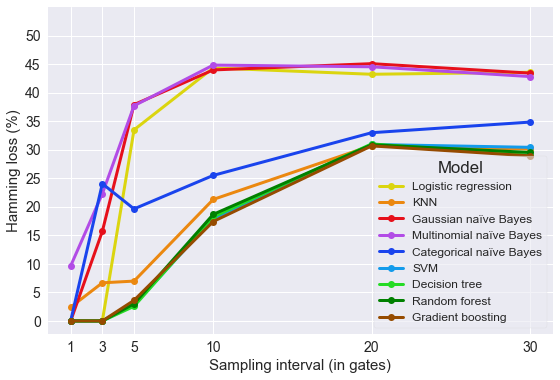

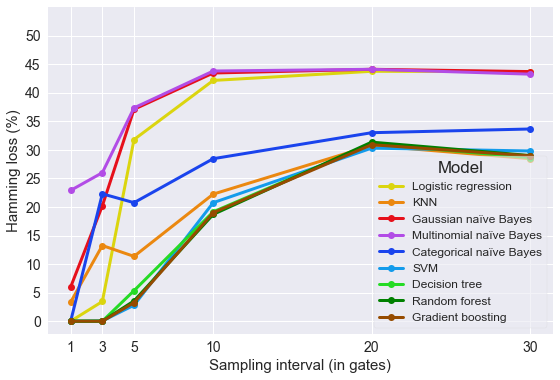

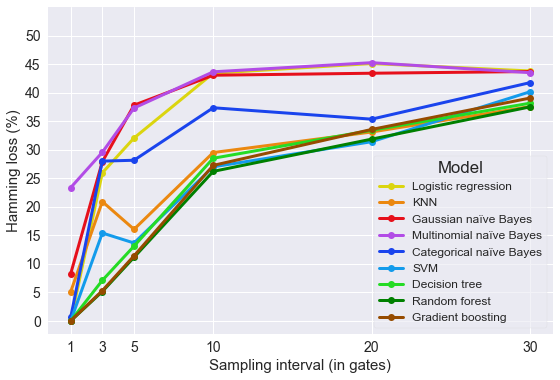

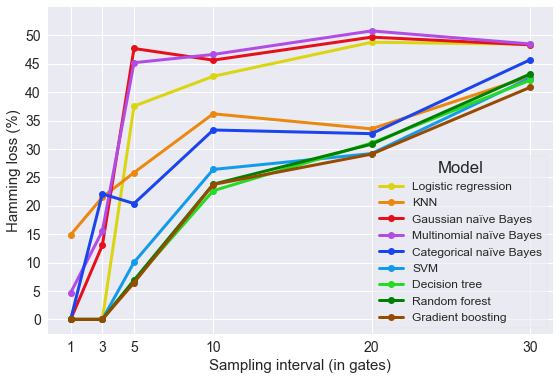

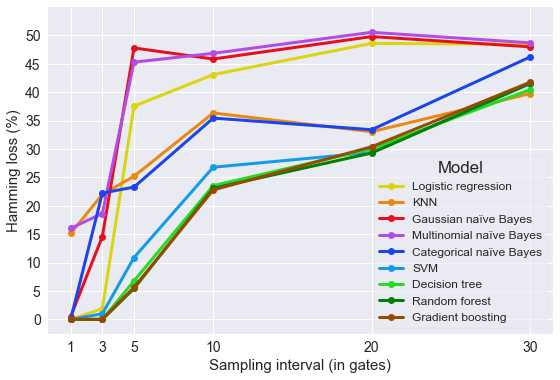

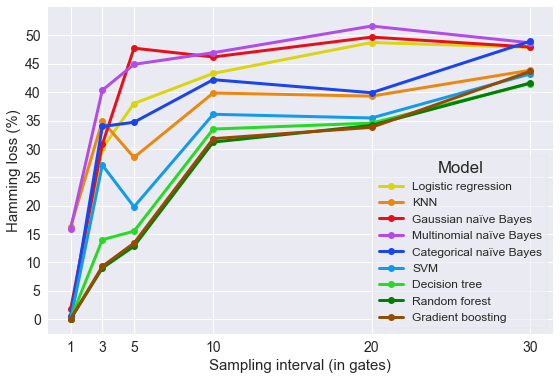

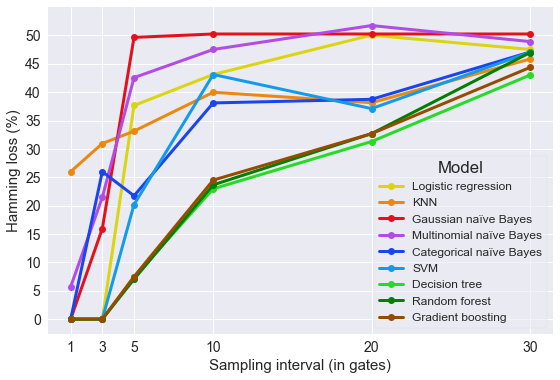

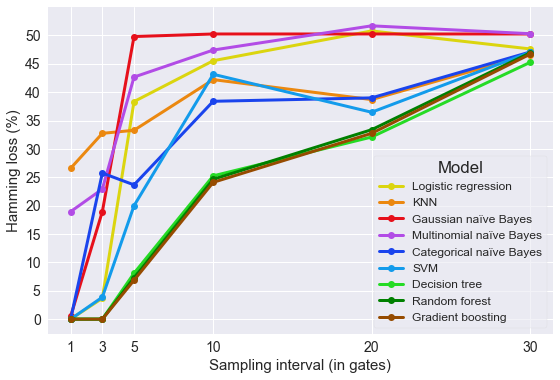

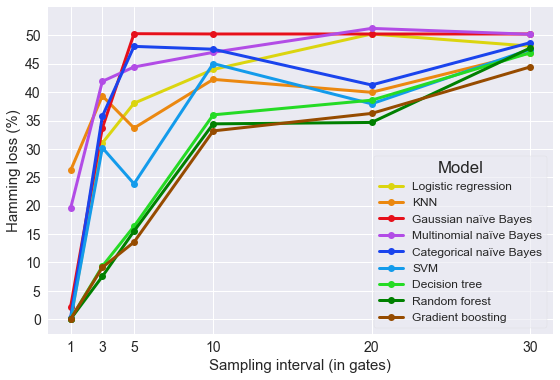

In [122]:
# Hamming loss vs sampling interval - per model (one plot per matrix size & noise level)
plt.rcParams.update({'legend.fontsize': 12})
for (n, m), yup in zip(matrix_sizes, [55, 55, 55]):
    for noise in noises:
        df = df_row_hamming[n+'x'+m][noise].T

        df.plot(lw=3, marker='o', ms=7, color=colors, xticks=df.index, yticks=range(0, yup, 5), ylim=(None,yup),
                xlabel='Sampling interval (in gates)', ylabel='Hamming loss (%)', legend=False)
        plt.legend(models, title='Model', title_fontsize='large', loc='lower right', frameon=True, fancybox=True, framealpha=0.6)

        plt.savefig(f'Results/Plots/hamming_loss_vs_sampling_per_model_{nb_name}_{n}x{m}_noise_std={noise}.png', dpi=200)
plt.show()

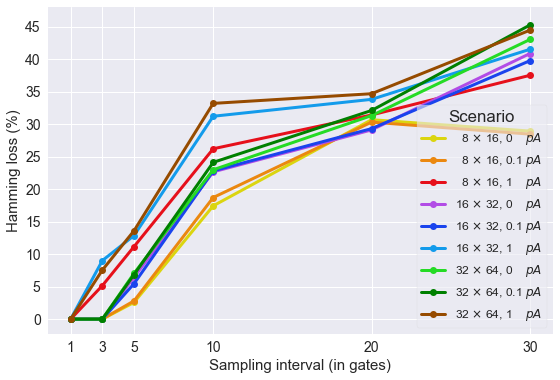

In [89]:
# Best hamming loss vs sampling interval - per matrix size and noise level
plt.rcParams.update({'legend.fontsize': 12})
df = df_row_hamming.min().unstack(level=[0,1]).sort_index() # get minimum value for hamming loss per sampling interval, turn matrix size & noise level into columns, sort sampling intervals

yup = 48
ax = df.plot(lw=3, marker='o', ms=7, color=colors, xticks=df.index, yticks=range(0, yup, 5), ylim=(None,yup),
             xlabel='Sampling interval (in gates)', ylabel='Hamming loss (%)', legend=False)
plt.legend(['  8 $\\times$ 16, 0    $pA$', '  8 $\\times$ 16, 0.1 $pA$', '  8 $\\times$ 16, 1    $pA$',
            '16 $\\times$ 32, 0    $pA$', '16 $\\times$ 32, 0.1 $pA$', '16 $\\times$ 32, 1    $pA$',
            '32 $\\times$ 64, 0    $pA$', '32 $\\times$ 64, 0.1 $pA$', '32 $\\times$ 64, 1    $pA$'],
           title='Scenario', title_fontsize='large', frameon=True, fancybox=True, framealpha=0.6)

plt.savefig(f'Results/Plots/hamming_loss_vs_sampling_per_size_&_noise_{nb_name}.png', dpi=200)
plt.show()

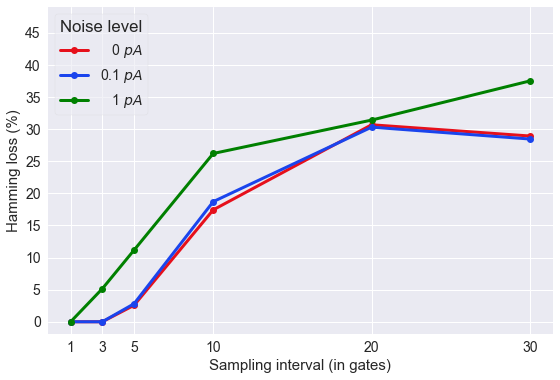

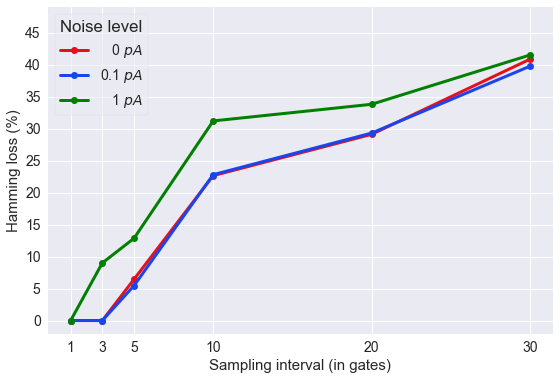

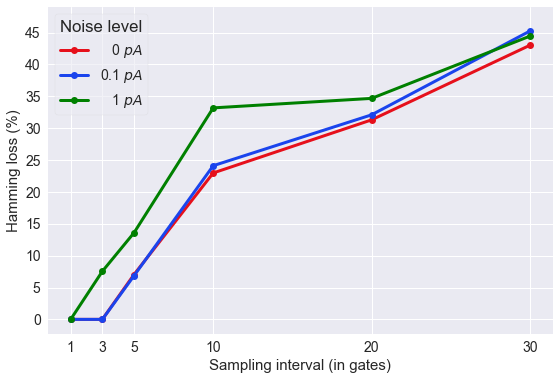

In [98]:
# Best hamming loss vs sampling interval - per noise level (one plot per matrix size)
plt.rcParams.update({'legend.fontsize': 14})
for (n, m), yup in zip(matrix_sizes, [49, 49, 49]):
    df = df_row_hamming.min()[n+'x'+m].unstack(level=0).sort_index() # get minimum value for hamming loss per sampling interval, choose matrix size, turn noise level into columns & sort sampling intervals

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[2,4,7]], xticks=df.index, yticks=range(0, yup, 5), ylim=(None,yup),
                 xlabel='Sampling interval (in gates)', ylabel='Hamming loss (%)', legend=False)
    plt.legend(['   0 $pA$', '0.1 $pA$', '   1 $pA$'], title='Noise level', title_fontsize='large',
               frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/hamming_loss_vs_sampling_per_noise_{nb_name}_{n}x{m}.png', dpi=200)
plt.show()

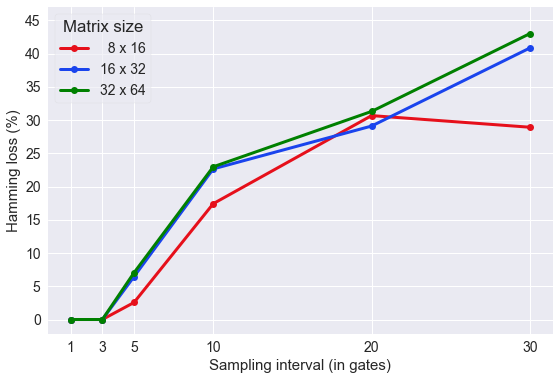

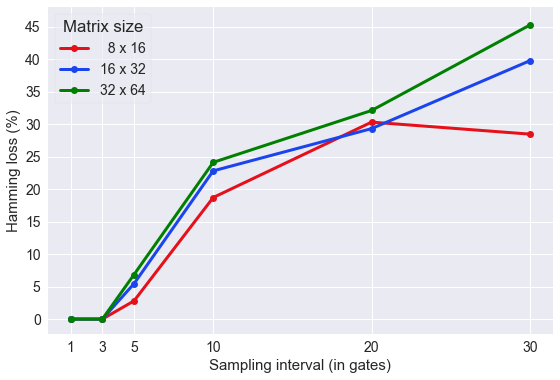

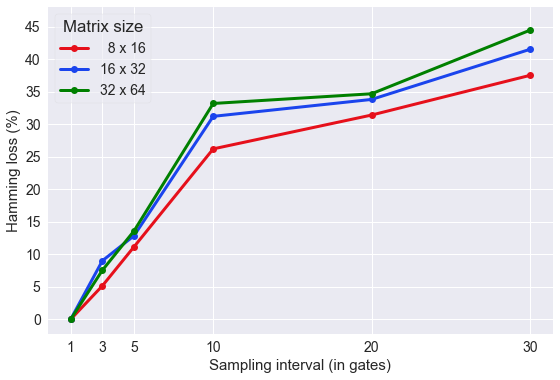

In [91]:
# Best hamming loss vs sampling interval - per matrix size (one plot per noise level)
plt.rcParams.update({'legend.fontsize': 14})
for noise, yup in zip(noises, [47, 48, 48]):
    df = df_row_hamming.min()[:, noise].unstack(level=0).sort_index() # get minimum value for hamming loss per sampling interval, choose noise level, turn matrix size into columns & sort sampling intervals
    df = df[[m+'x'+n for m, n in matrix_sizes]] # reorder matrix sizes

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[2,4,7]], xticks=df.index, yticks=range(0, yup, 5), ylim=(None,yup),
                 xlabel='Sampling interval (in gates)', ylabel='Hamming loss (%)', legend=False)
    plt.legend(['  8 x 16', '16 x 32', '32 x 64'], title='Matrix size', title_fontsize='large',
               frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/hamming_loss_vs_sampling_per_size_{nb_name}_noise_std={noise}.png', dpi=200)
plt.show()

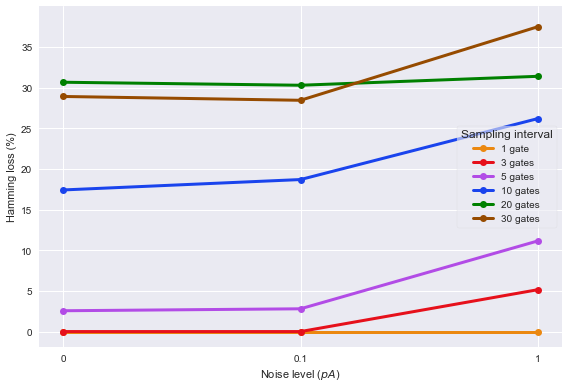

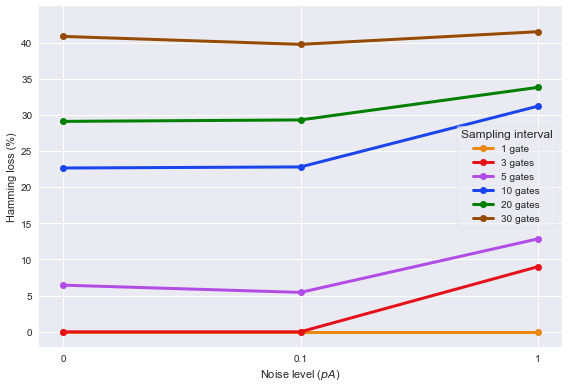

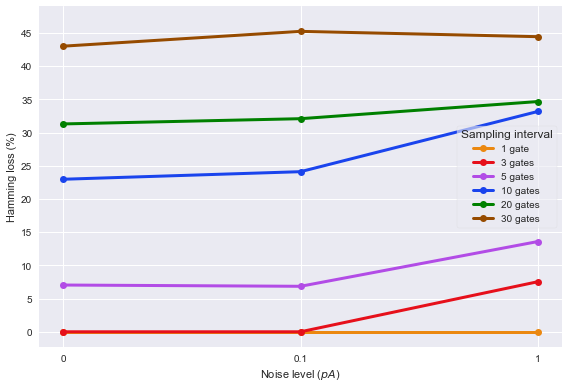

In [81]:
# Best hamming loss vs noise level - per sampling interval (one plot per matrix size)
for (n, m), yup in zip(matrix_sizes, [40, 45, 49]):
    df = df_row_hamming.min()[n+'x'+m].unstack().sort_index(axis=1) # get minimum value for hamming loss per sampling interval, choose matrix size, turn sampling interval into columns & sort them

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[1,2,3,4,7,8]], xticks=range(len(df.index)), yticks=range(0, yup, 5),
                 ylim=(None,yup), xlabel='Noise level ($pA$)', ylabel='Hamming loss (%)', legend=False)
    ax.set_xticklabels([0, 0.1, 1])
    plt.legend(['1 gate', '3 gates', '5 gates', '10 gates', '20 gates', '30 gates'], title='Sampling interval',
               title_fontsize='large', frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/hamming_loss_vs_noise_per_sampling_{nb_name}_{n}x{m}.png', dpi=200)
plt.show()

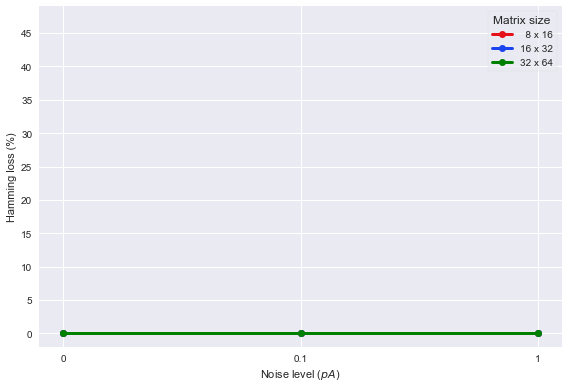

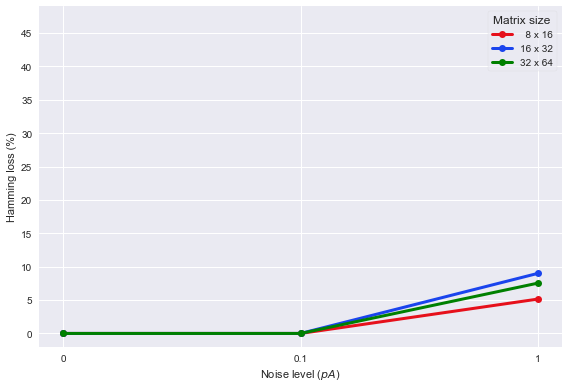

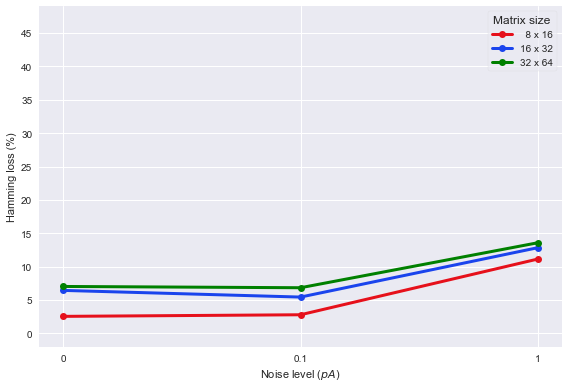

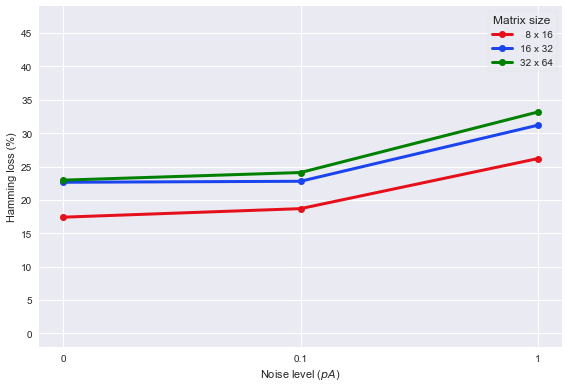

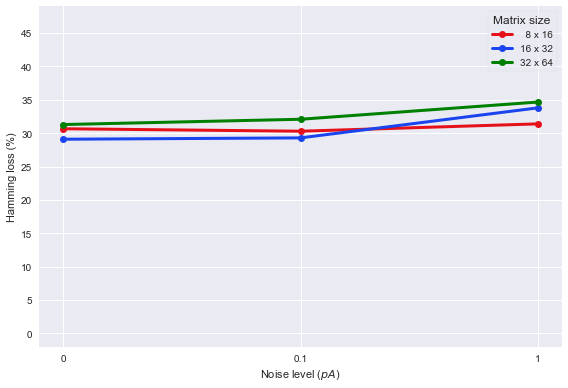

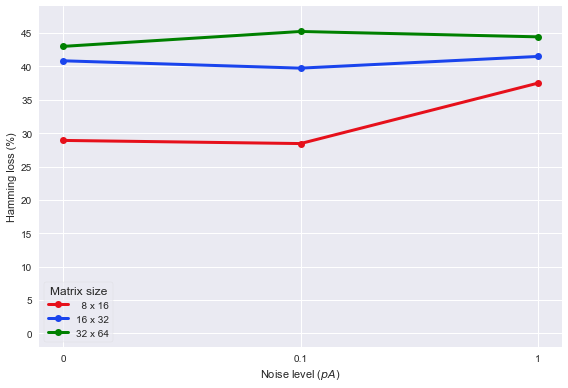

In [82]:
# Best hamming loss vs noise level - per matrix size (one plot per sampling interval)
for sampling in samplings:
    df = df_row_hamming.min()[:, :, sampling].unstack(level=0) # get minimum value for hamming loss per sampling interval, choose sampling interval & turn matrix size into columns
    df = df[[m+'x'+n for m, n in matrix_sizes]] # reorder matrix sizes

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[2,4,7]], xticks=range(len(df.index)), yticks=range(0, 49, 5), ylim=(-2,49),
                 xlabel='Noise level ($pA$)', ylabel='Hamming loss (%)', legend=False)
    ax.set_xticklabels([0, 0.1, 1])
    plt.legend(['  8 x 16', '16 x 32', '32 x 64'], title='Matrix size', title_fontsize='large',
               frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/hamming_loss_vs_noise_per_size_{nb_name}_sampling={sampling}.png', dpi=200)
plt.show()

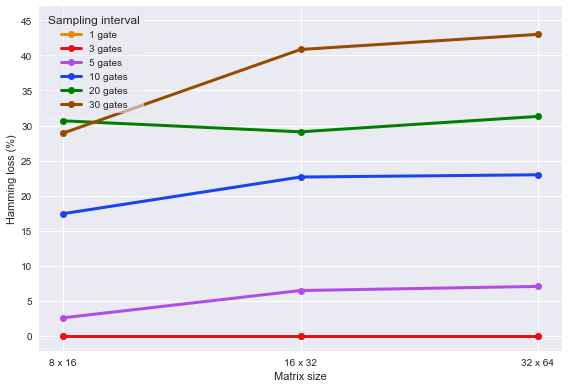

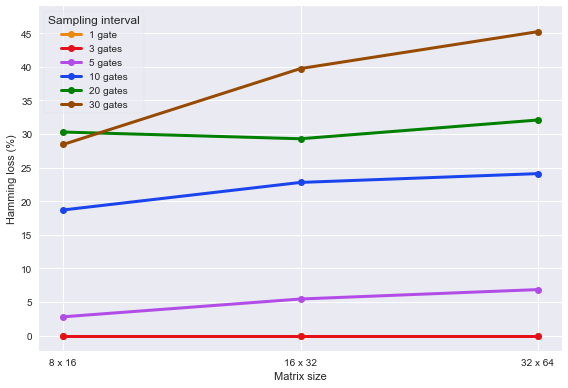

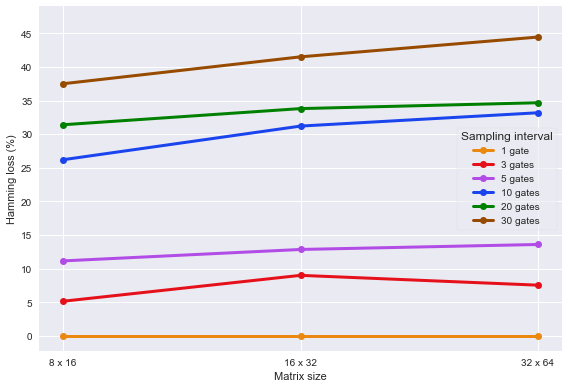

In [83]:
# Best hamming loss vs matrix size - per sampling interval (one plot per noise level)
for noise, yup in zip(noises, [47, 49, 49]):
    df = df_row_hamming.min()[:, noise].unstack(level=1).sort_index(axis=1) # get minimum value for hamming loss per sampling interval, choose noise level, turn sampling interval into columns & sort them
    df = df.reindex([m+'x'+n for m, n in matrix_sizes], copy=False) # reorder matrix sizes

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[1,2,3,4,7,8]], xticks=range(len(df.index)), yticks=range(0, yup, 5),
                 ylim=(None,yup), xlabel='Matrix size', ylabel='Hamming loss (%)', legend=False)
    ax.set_xticklabels([m+' x '+n for m, n in matrix_sizes])
    plt.legend(['1 gate', '3 gates', '5 gates', '10 gates', '20 gates', '30 gates'], title='Sampling interval',
               title_fontsize='large', frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/hamming_loss_vs_size_per_sampling_{nb_name}_noise_std={noise}.png', dpi=200)
plt.show()

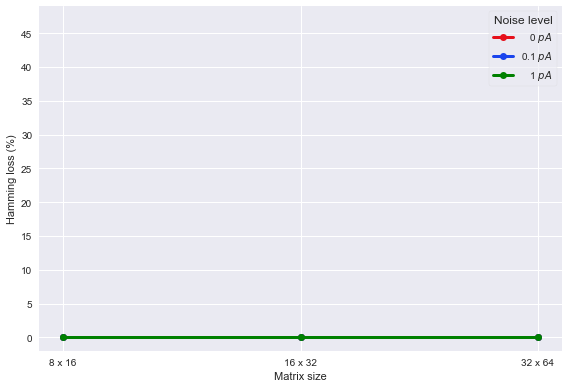

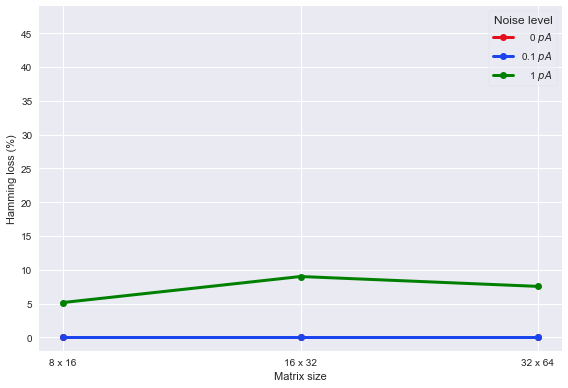

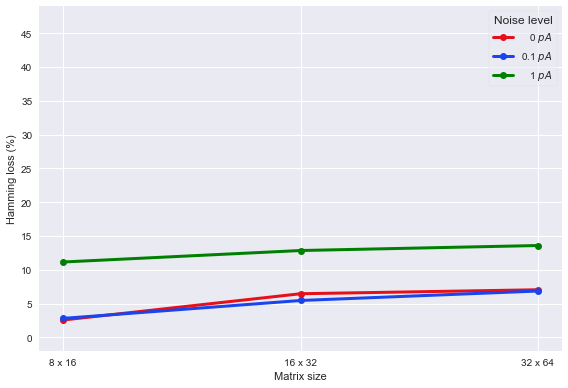

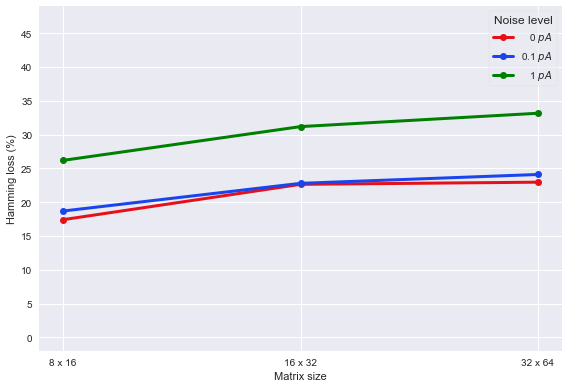

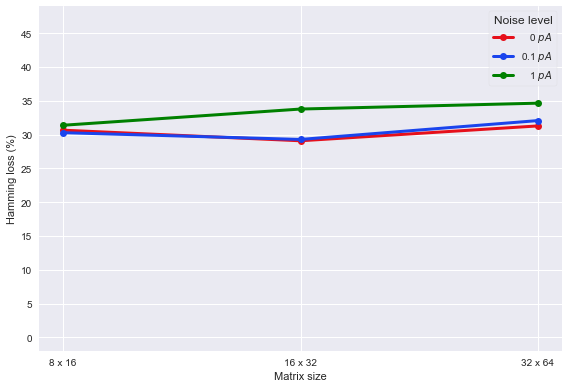

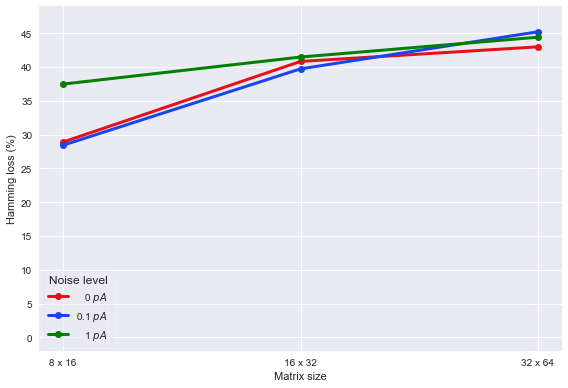

In [84]:
# Best hamming loss vs matrix size - per noise level (one plot per sampling interval)
for sampling in samplings:
    df = df_row_hamming.min()[:, :, sampling].unstack(level=1) # get minimum value for hamming loss per sampling interval, choose sampling interval & turn noise level into columns
    df = df.reindex([m+'x'+n for m, n in matrix_sizes], copy=False) # reorder matrix sizes

    ax = df.plot(lw=3, marker='o', ms=7, color=colors[[2,4,7]], xticks=range(len(df.index)), yticks=range(0, 49, 5), ylim=(-2,49),
                 xlabel='Matrix size', ylabel='Hamming loss (%)', legend=False)
    ax.set_xticklabels([m+' x '+n for m, n in matrix_sizes])
    plt.legend(['   0 $pA$', '0.1 $pA$', '   1 $pA$'], title='Noise level', title_fontsize='large',
               frameon=True, fancybox=True, framealpha=0.6)

    plt.savefig(f'Results/Plots/hamming_loss_vs_size_per_noise_{nb_name}_sampling={sampling}.png', dpi=200)
plt.show()

### Comparison

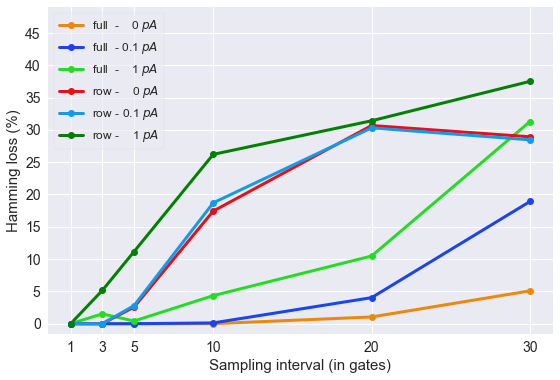

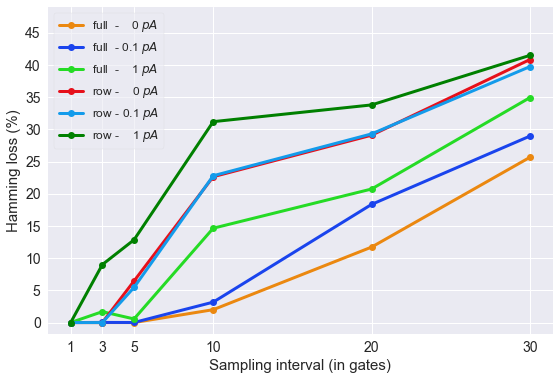

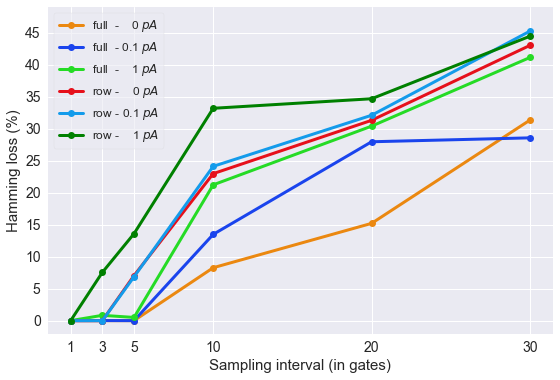

In [24]:
# Best hamming loss vs sampling interval - per noise level (one plot per matrix size)
plt.rcParams.update({'legend.fontsize': 12})
for (n, m), yup in zip(matrix_sizes, [49, 49, 49]):
    df1 = df_full_hamming.min()[n+'x'+m].unstack(level=0).sort_index() # get minimum value for hamming loss per sampling interval, choose matrix size, turn noise level into columns & sort sampling intervals
    df2 = df_row_hamming.min()[n+'x'+m].unstack(level=0).sort_index() # get minimum value for hamming loss per sampling interval, choose matrix size, turn noise level into columns & sort sampling intervals

    ax = df1.plot(lw=3, marker='o', ms=7, color=colors[[1,4,6]], xticks=df1.index, yticks=range(0, yup, 5), ylim=(None,yup),
                  xlabel='Sampling interval (in gates)', ylabel='Hamming loss (%)', legend=False)
    df2.plot(lw=3, marker='o', ms=7, color=colors[[2,5,7]], xticks=df2.index, yticks=range(0, yup, 5), ylim=(None,yup),
                 xlabel='Sampling interval (in gates)', ylabel='Hamming loss (%)', legend=False, ax=ax)
    plt.legend(['full  -    0 $pA$', 'full  - 0.1 $pA$', 'full  -    1 $pA$',
                'row -    0 $pA$', 'row - 0.1 $pA$', 'row -    1 $pA$'], frameon=True, fancybox=True, framealpha=0.6)

    # plt.savefig(f'Results/Plots/hamming_loss_vs_sampling_per_noise_full_vs_row_{n}x{m}.png', dpi=200)
plt.show()